# Heart Disease Challenge
#### Diagnosing Heart Disease


### Table of Contents

1. [Introduction ](#section1)
2. [Attributes Information](#section2)
3. [Data Exploration](#section3)

- 3.1. [Heart Disease Cleveland dataset Analysis](#section3.1)
    - 3.1.1. [Corelations Cleveland dataset](#section3.1.1)
    - 3.1.2. [Machine Learning Cleveland dataset](#section3.1.2)
    - 3.1.3. [Model Validation Cleveland dataset](#section3.1.3)

- 3.2. [Heart Disease Hungarian dataset Analysis](#section3.2)
    - 3.2.1. [Corelations Hungarian dataset](#section3.2.1)
    - 3.2.2. [Machine Learning Hungarian dataset](#section3.2.2)
    - 3.2.3. [Model Validation Hungarian dataset](#section3.2.3)

- 3.3. [Heart Disease Switzerland dataset Analysis](#section3.3)    
    - 3.3.1. [Corelations Switzerland dataset](#section3.3.1)
    - 3.3.2. [Machine Learning Switzerland dataset](#section3.3.2)
    - 3.3.3. [Model Validation Switzerland dataset](#section3.3.3)

- 3.4. [Heart Disease VA dataset Analysis](#section3.4)
    - 3.4.1. [Corelations VA dataset](#section3.4.1)
    - 3.4.2. [Machine Learning VA dataset](#section3.4.2)
    - 3.4.3. [Model Validation VA dataset](#section3.4.3)

4. [Compound of datasets](#section4)
5. [Conclusion](#section5)
6. [References](#section6)

##  1. Introduction <a class="anchor" id="section1"></a>

World Health Organization announced that millions of people worldwide struggle to control the risk factors tha lead to cardiovascular disease, many others remain unaware that they are at high risk. A large numbe of heart attacks and strokes can be prevented by controlling major risk factors through lifestyle interventions and drug treatment where necessary.

In this challange we are going to apply Machine Learning analysis on the Hart Disease datasets which are provided by four different sources:

- Hungarian Institute of Cardiology
- University Hospital, Zurich, Switzerland
- Medical Center, Cleveland Clinic Foundation
- V.A. Long Beach Clinic Foundation

The predictive feature refers to the presence of the heart disease of the patient. It is an integer value ranging from 0 to 4.

### Goal

Those datasets give a number of variables along with a target condition of having or not having heart disease. The goal of this alayses is to find the major factors that have an impact over the health of people, because 
understanding the risks will help to prevent a heart attack.

According to this [source](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the more risk factors you have, and the greater the degree of each risk factor, the higher your chance of developing coronary heart disease – a common term for the buildup of plaque in the heart’s arteries that could lead to heart attack. 

The major factors that can't be changed are: increasing age, gender and heredity. Note that thalassemia, one of the variables in those datasets, is heredity. 

Major factors that can be modified are: smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. Other factors include stress, alcohol and poor diet/nutrition.


## 2. Attributes Information <a class="anchor" id="section2"></a>
#### Data Set Information

**[[heart disease dataset]](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Only 14 attributes used:
- age: age in years
- sex: sex (1=male; 0=female)
- cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: number of major vessels (0-3) coloured by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)
    
(in any major vessel: attributes 59 through 68 are vessels)

## 3. Data Exploration <a class="anchor" id="section3"></a>

In [103]:
# Loading appropriate libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt # this is used for the plot the graph

# Libraries for model selection

from sklearn.model_selection import train_test_split # for data splitting
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression #for the model
from sklearn.tree import DecisionTreeClassifier #for the model
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.tree import export_graphviz # plot tree

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP (SHapley Additive exPlanations) values
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

%matplotlib inline

In [104]:
# Ignore packages warnings
import warnings
warnings.filterwarnings("ignore")

In [105]:
# Input data files are available in the "./data/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['processed.cleveland.data.csv', 'processed.hungarian.data.csv', 'processed.switzerland.data.csv', 'processed.va.data.csv']


In [106]:
# Reading the csv files
data_cleveland = pd.read_csv('./data/processed.cleveland.data.csv')
data_hungarian = pd.read_csv('./data/processed.hungarian.data.csv')
data_switzerland = pd.read_csv('./data/processed.switzerland.data.csv')
data_va = pd.read_csv('./data/processed.va.data.csv')

In [107]:
# Data details
cleveland_rows, cleveland_cols = data_cleveland.shape
hungarian_rows, hungarian_cols = data_hungarian.shape
switzerland_rows, switzerland_cols = data_switzerland.shape
va_rows, va_cols = data_va.shape

print(f"Hungarian Institude of Cardiology: {hungarian_rows} \n" + 
      f"University Hospital, Zurich & Basel, Switzerland: {switzerland_rows} \n" +
      f"Cleveland Clinic Foundation, Robert Detrano: {cleveland_rows} \n" +
      f"V.A. Long Beach Medical Center, Robert Detrano: {va_rows} \n")

Hungarian Institude of Cardiology: 294 
University Hospital, Zurich & Basel, Switzerland: 123 
Cleveland Clinic Foundation, Robert Detrano: 303 
V.A. Long Beach Medical Center, Robert Detrano: 200 



## 3.1. Heart Disease Cleveland dataset Analysis <a class="anchor" id="section3.1"></a>
#### Cleveland Clinic Foundation

In [108]:
# The head method operates on a dataframe by displaying a number of rows. The first 5 rows are displayed if no arguments are passed.
data_cleveland.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [109]:
n_rows, n_cols = data_cleveland.shape
print(f"There exists {n_rows} domain instances with {n_cols} features in the dataset.")

There exists 303 domain instances with 14 features in the dataset.


In [110]:
# Let's see the names of columns
data_cleveland.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Measures of shape describe the distribution of the data within this dataset. These distributions show the spread (dispersion, variability, scatter) of the data. 

In [111]:
data_cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statisctial Details Describe provides us with statistical in numerical format about the specific details of each of the columns. We can deduct that in age column the minimum age is 29 years and maximum is 77 years mean of age is 54 years. The quantities details are given in form of 25%, 50% and 75%. The data is divided into 3 quarties of 4 eaqul parts. Those statistical measures give us an idea  of the central tendency of the data set. However, mean is effected by outliers and hence we need more information to make accurate decisions. 

In [112]:
data_cleveland.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

The dataset doesn't have missing information/ no null values. 

In [113]:
print(data_cleveland.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Let's rename the column headers for better understanding and visualization.

In [114]:
data_cleveland.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','slope':'ST_slope','target':'Heart_attack'}, inplace = True)

In [115]:
df_cleveland = data_cleveland.copy() # default dataset

In [116]:
# Check of the changes
df_cleveland.dtypes

Age                          int64
Sex                          int64
Chest_pain                   int64
Resting_blood_pressure       int64
Cholesterol                  int64
Fasting_blood_sugar          int64
ECG_results                  int64
Maximum_heart_rate           int64
Exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
Major_vessels                int64
Thalassemia_types            int64
Heart_attack                 int64
dtype: object

We can find the types of the field which we don't need to convert to. However, we can replace some of the colummns as these will make the understanding of visualizations better instead of numeric values.

In [117]:
df_cleveland['Sex'].replace({1:'Male', 0:'Female'}, inplace=True)
df_cleveland['Sex'] = df_cleveland['Sex'].astype('object')

### 3.1.1. Corelations Cleveland dataset <a class="anchor" id="section3.1.1"></a>

<AxesSubplot:>

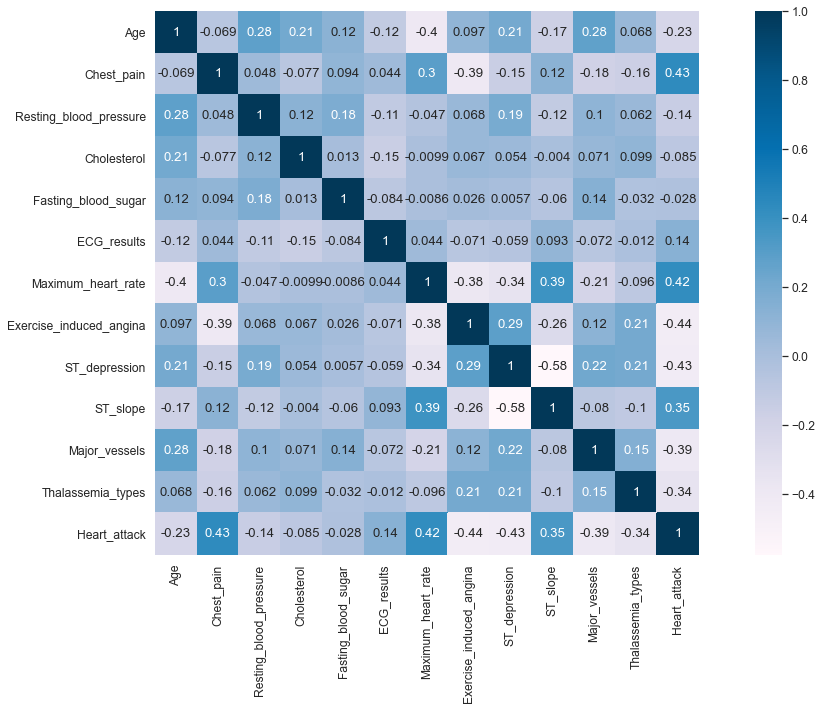

In [118]:
plt.figure(figsize=(20,10))
cm = df_cleveland.corr()
sns.set(font_scale=1.1)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            cmap='PuBu')


We see strong positive correlation between Heart attack and Chest pain, Maximum heart rate, ST slope and also negative correlation between Heart attack and  Exercise induced angina, Sex, Major vessels, Thalassemia types, ST depression.

In [119]:
# Chest pain & Heart attack
df_cleveland.groupby('Chest_pain', as_index=False)['Heart_attack'].mean()

,Chest_pain,Heart_attack
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [120]:
# ST_slope & Heart attack
df_cleveland.groupby('ST_slope', as_index=False)['Heart_attack'].mean()

,ST_slope,Heart_attack
0,0,0.428571
1,1,0.350000
2,2,0.753521


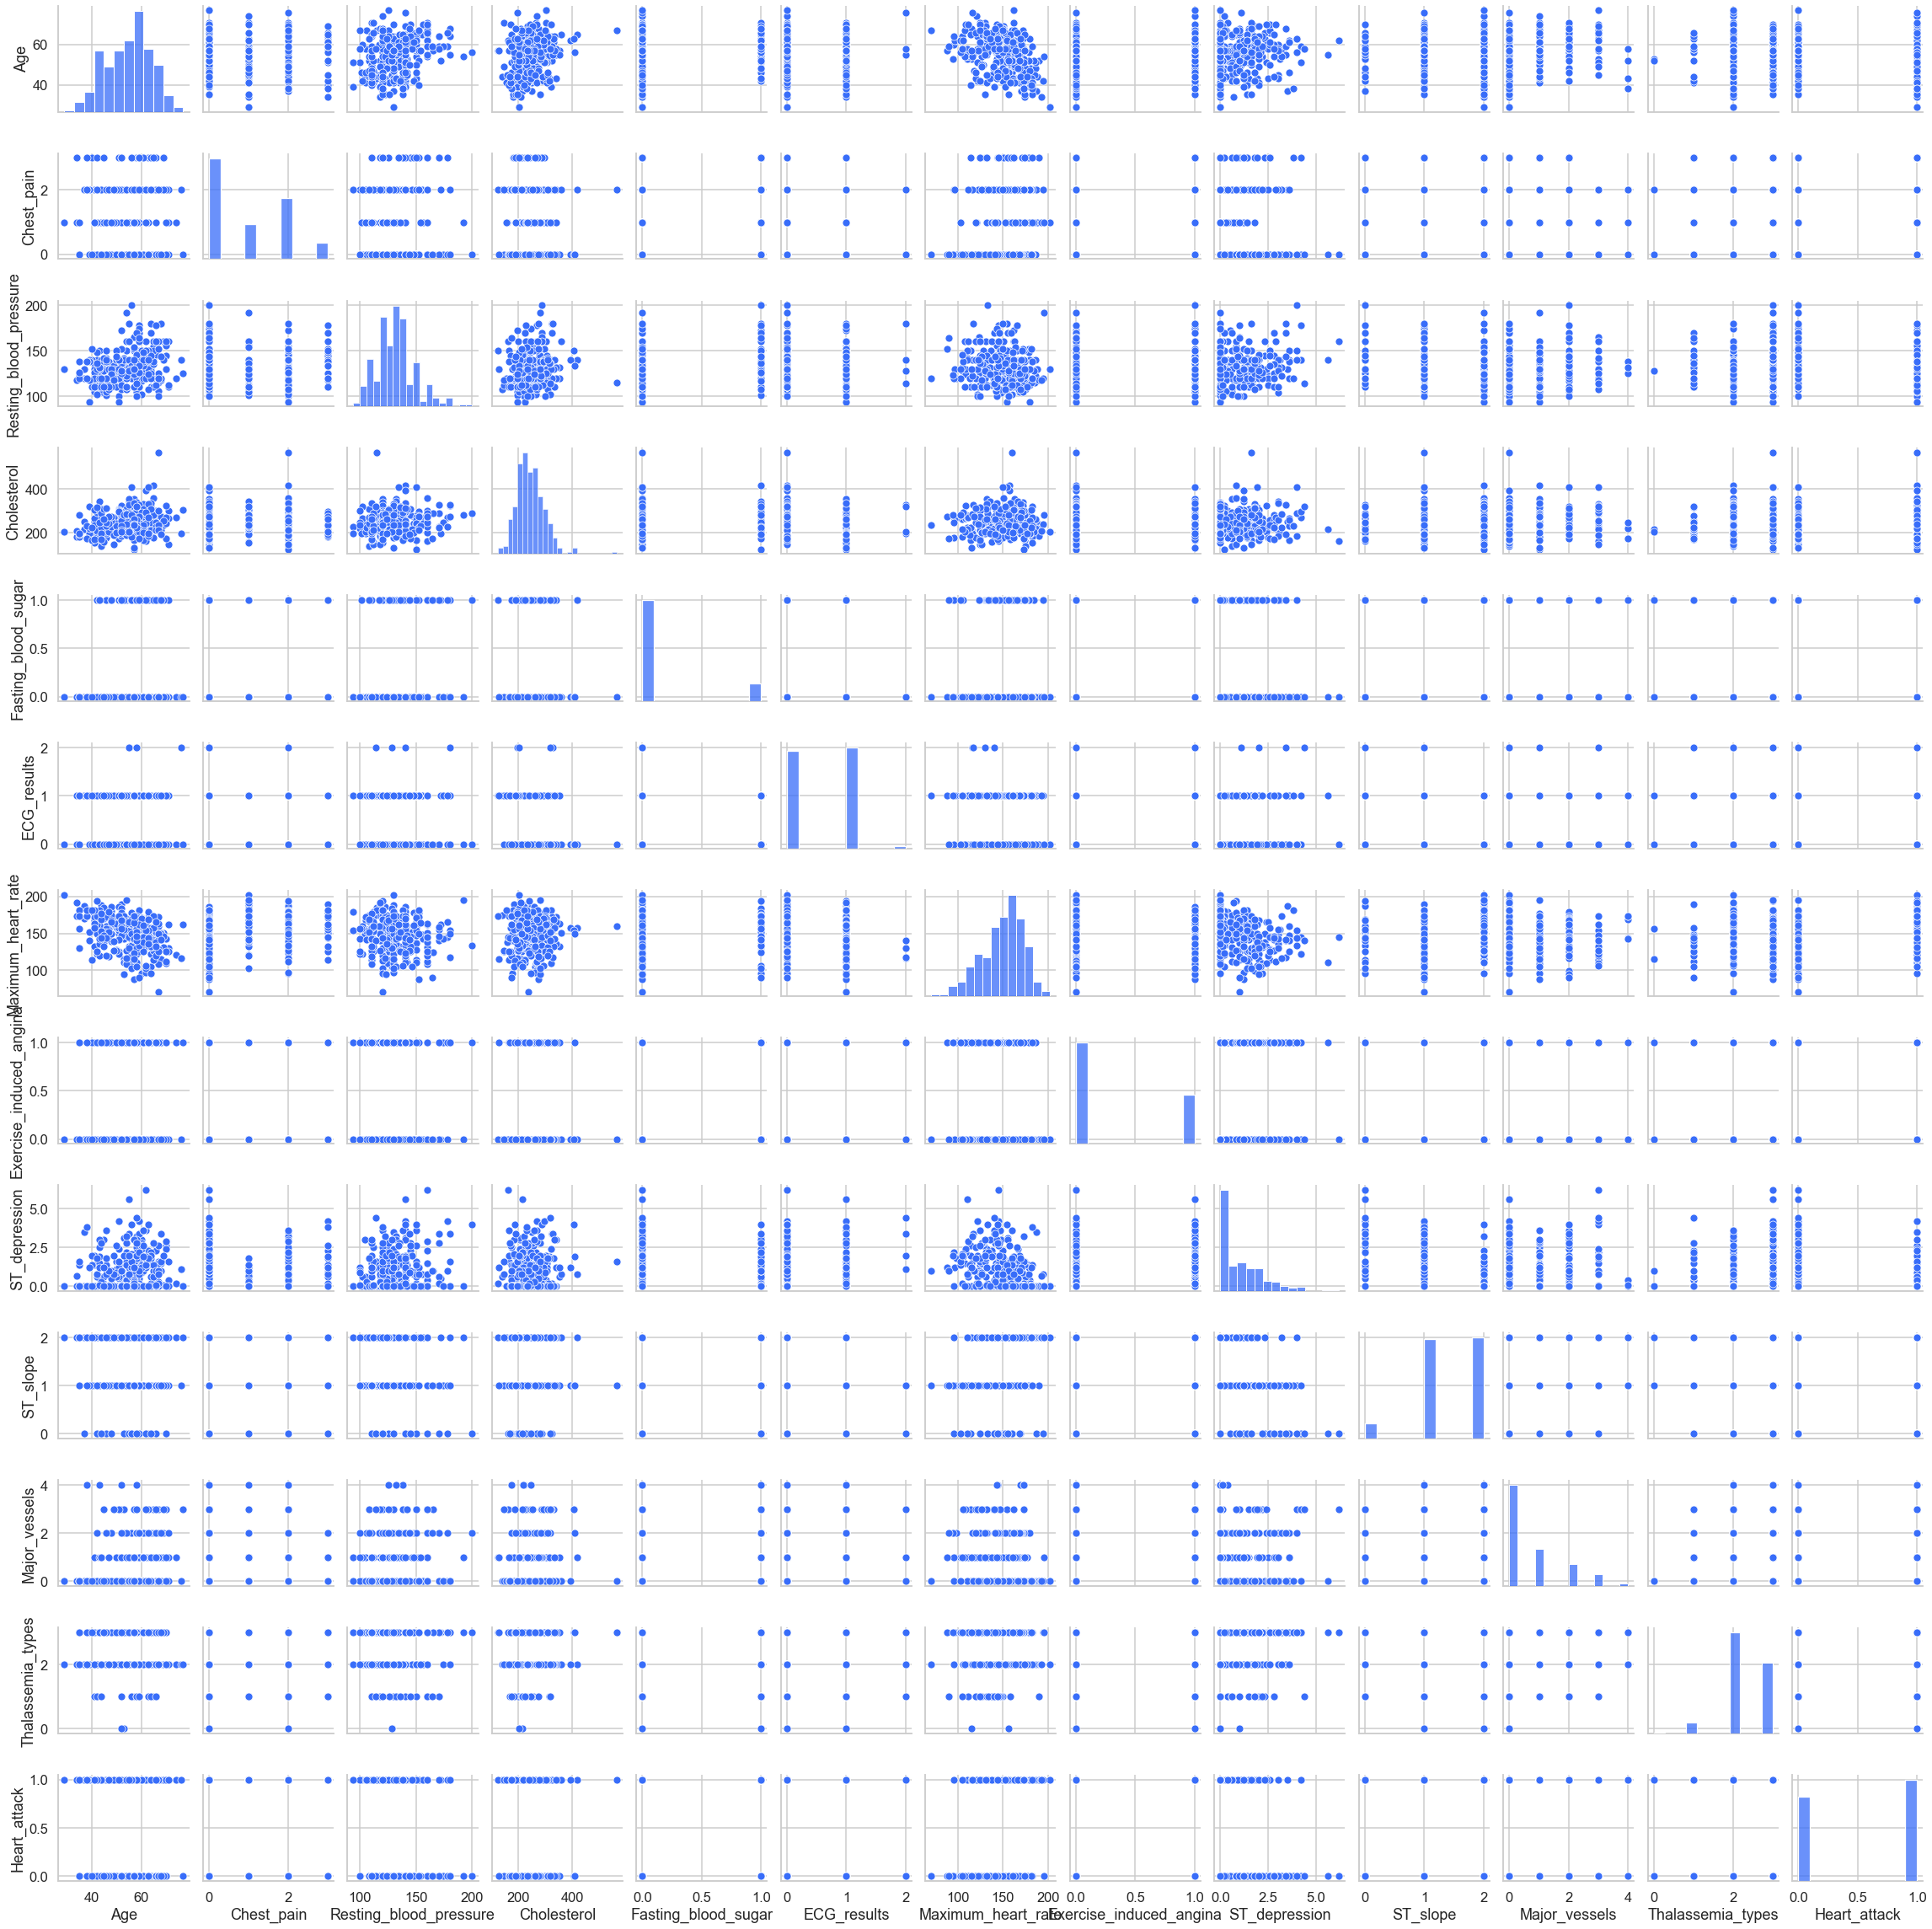

In [121]:
# Change defaults for this visualization
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('rainbow')

# Basic pair plot for the dataset
sns.pairplot(data=df_cleveland)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Chest_pain'}>],
       [<AxesSubplot:title={'center':'Resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'Fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'ECG_results'}>],
       [<AxesSubplot:title={'center':'Maximum_heart_rate'}>,
        <AxesSubplot:title={'center':'Exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'ST_depression'}>,
        <AxesSubplot:title={'center':'ST_slope'}>],
       [<AxesSubplot:title={'center':'Major_vessels'}>,
        <AxesSubplot:title={'center':'Thalassemia_types'}>],
       [<AxesSubplot:title={'center':'Heart_attack'}>, <AxesSubplot:>]],
      dtype=object)

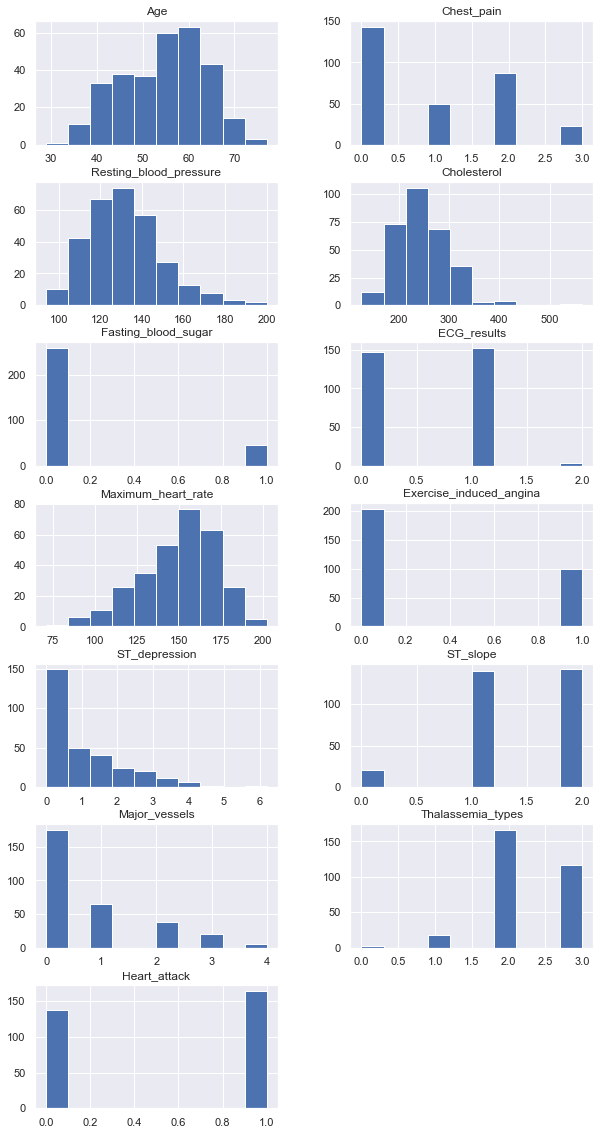

In [122]:
# Dataset histogram
sns.set(font_scale=1)
df_cleveland.hist(figsize=(10,20), layout=(7,2))

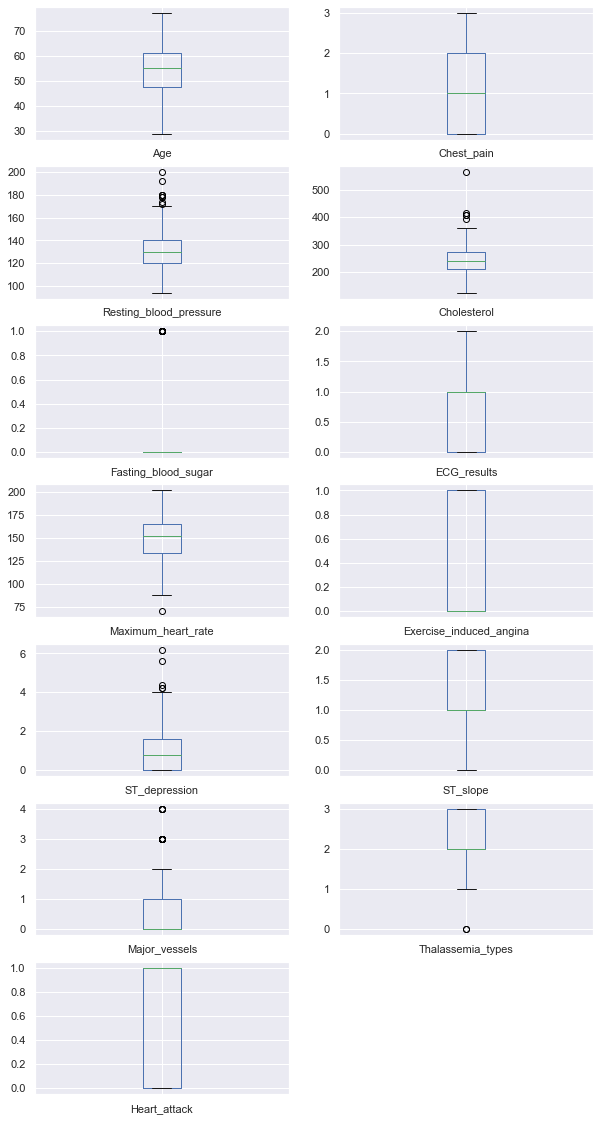

In [123]:
# Box and whiskers plot
df_cleveland.plot(kind='box', subplots=True, layout=(7,2), figsize=(10,20))
plt.show()

From the last plot we you can see that the dataset contains extreme values that are outside the range of what is expected. For instance the age, cholesterol, fasting blood sugar and st depression.

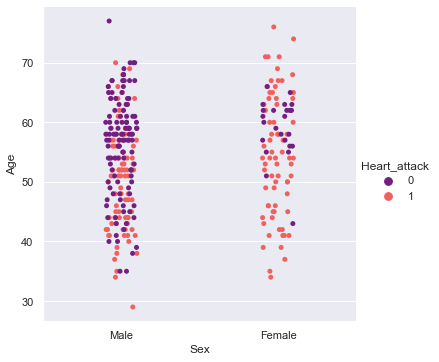

In [124]:
sns.catplot(data=df_cleveland, x='Sex', y='Age', hue='Heart_attack', palette='magma', legend=True) # target presents having or not having heart diseases


The plot shows that the majority of the males have a heart diseas. 

Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

The cholesterol level of the males having a heart disease is higher than those without.

In [125]:
df_cleveland['Sex'].value_counts()

Male      207
Female     96
Name: Sex, dtype: int64

Output: 206 males and 96 females

In [126]:
df_cleveland['Heart_attack'].value_counts()

1    165
0    138
Name: Heart_attack, dtype: int64

The Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0) of Heart attack.

Output: absence 165 cases of heart diseases and 138 cases of some heart disease

In [127]:
df_cleveland['Thalassemia_types'].value_counts()

2    166
3    117
1     18
0      2
Name: Thalassemia_types, dtype: int64

Thalassemia types: 3 = normal; 2 = fixed defect; 1 = reversable defect; The rest is undefined

<AxesSubplot:xlabel='Thalassemia_types', ylabel='count'>

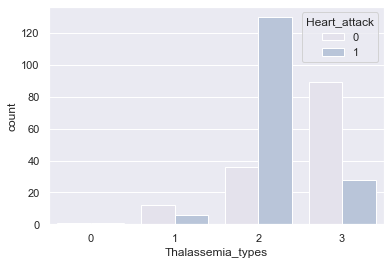

In [128]:
sns.countplot(x='Thalassemia_types', data=df_cleveland, hue='Heart_attack', palette=sns.color_palette("PuBu",5))  # target represents having or not having heart diseases

Thalassemia types: 3 = normal; 6 = fixed defect; 7 = reversable defect

<AxesSubplot:xlabel='Thalassemia_types', ylabel='count'>

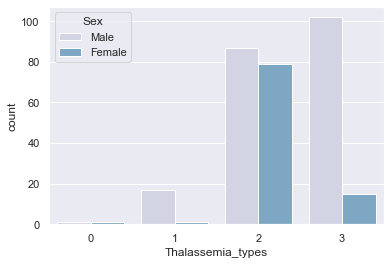

In [129]:
sns.countplot(x='Thalassemia_types', data=df_cleveland, hue='Sex', palette=sns.color_palette("PuBu", 3))

<AxesSubplot:xlabel='Sex', ylabel='count'>

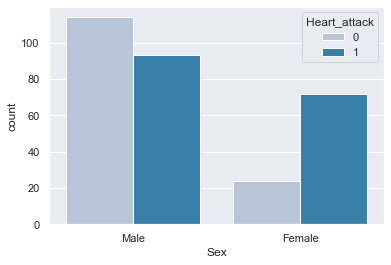

In [130]:
sns.countplot(x='Sex', data=df_cleveland, hue='Heart_attack', palette='PuBu')

We observe that the males have more heart diseases than the females compared with the given dataset.

<AxesSubplot:xlabel='Heart_attack', ylabel='count'>

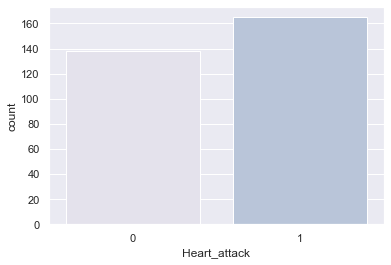

In [131]:
 sns.countplot(x='Heart_attack', palette=sns.color_palette("PuBu", 5), data=df_cleveland)  # target represents having or not having heart diseases

We observer that the count for not having heart disease and having heart disease are almost balanced - the amount not having disease is above 160 and if we combine all of the rest those having are below 140.

In [132]:
sort_by_heart_attack = df_cleveland.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_heart_attack.head(20).style.background_gradient(cmap='Blues')

,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


This shows the total number of heart attacks that have occured for a particular age in case of males and females. In the top 20 count of heart attack, males have witnessed more heart attacks for their ages.

<AxesSubplot:xlabel='Major_vessels', ylabel='count'>

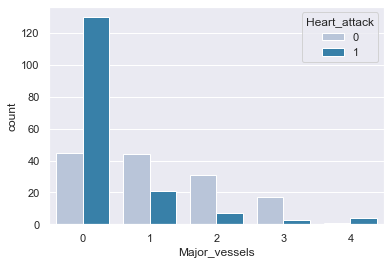

In [133]:
sns.countplot(x='Major_vessels', hue='Heart_attack', data=df_cleveland, palette='PuBu') # target presents having or not having heart diseases

###### ca: number of major vessels (0-3) coloured by flourosopy, the rest is undefined

In [134]:
df_cleveland['Major_vessels'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: Major_vessels, dtype: int64

ca number of major vessels (0-3) coloured by flourosopy (ca) Major_vessels has a negative corelation with the Heart attack i.e. when ca will increase we witness a drop in heart disease and vice versa. 

In [135]:
df_cleveland['Chest_pain'].value_counts() # chest pain type

0    143
2     87
1     50
3     23
Name: Chest_pain, dtype: int64

Output: 4 = 144, 3 = 86, 2 = 50, 1 = 23

<AxesSubplot:xlabel='Chest_pain', ylabel='count'>

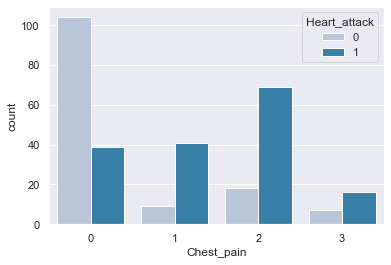

In [136]:
sns.countplot(x='Chest_pain', hue='Heart_attack', data=df_cleveland, palette='PuBu')  # target represents having or not having heart diseases

Shows chest pain with respet to heart disease/target

Let's find how many male and female have chest pain.

In [137]:
sort_by_chest_pain = df_cleveland.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_chest_pain.head(10).style.background_gradient(cmap='PuBu')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


The Males having chest pain type 4 suffered the most heart attacks and type 3 the second highest. This trend is same for females.

<AxesSubplot:xlabel='Sex', ylabel='Chest_pain'>

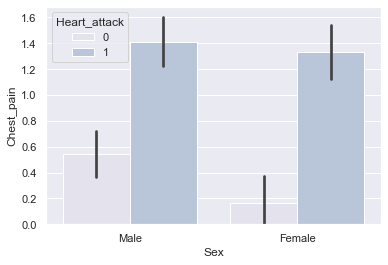

In [138]:
sns.barplot(x='Sex', y='Chest_pain', hue='Heart_attack', data=df_cleveland, palette=sns.color_palette("PuBu", 5))  # target represents having or not having heart diseases

<AxesSubplot:xlabel='Chest_pain', ylabel='count'>

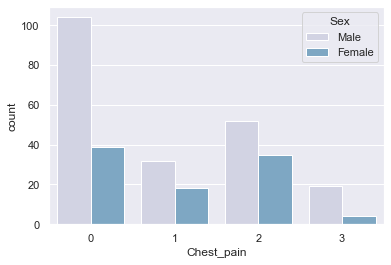

In [139]:
sns.countplot(x='Chest_pain', hue='Sex', data=df_cleveland, palette=sns.color_palette("PuBu", 3))

This shows chest pain count experienced by male and female.

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

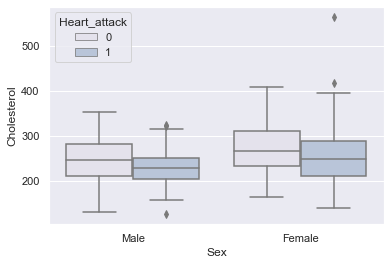

In [140]:
sns.boxplot(x='Sex', y='Cholesterol', data=df_cleveland, hue='Heart_attack', palette=sns.color_palette("PuBu", 5)) # target presents having or not having heart diseases

In [141]:
sort_by_cholesterol = df_cleveland.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_cholesterol.head(10).style.background_gradient(cmap='Blues')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


We observed that there is huge correlaction between the increase case cholesterol levels and heart attack cases. There is a significant risk that the cholesterol levels can lead to heart attack.

<AxesSubplot:xlabel='Sex', ylabel='ST_depression'>

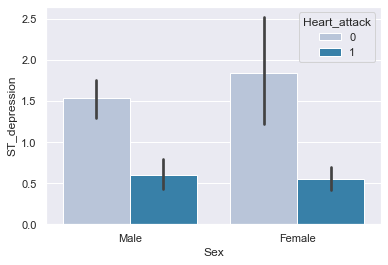

In [142]:
sns.barplot(x='Sex', y='ST_depression', data=df_cleveland, hue='Heart_attack', palette='PuBu') 

In [143]:
sort_by_st_depression = df_cleveland.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_st_depression.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0.000000,64
0,Female,0.000000,35
37,Male,1.200000,13
34,Male,0.800000,10
36,Male,1.000000,9
41,Male,1.800000,8
38,Male,1.400000,8
33,Male,0.600000,8
43,Male,2.000000,7
40,Male,1.600000,7


The lower the depression, the higher the cases were for heart attack.

###### oldpeak = ST depression induced by exercise relative to rest, measures of abnormality in electrocardiograms

In [144]:
df_cleveland['Fasting_blood_sugar'].value_counts()

0    258
1     45
Name: Fasting_blood_sugar, dtype: int64

Output: 0 = 258, 1 = 45

<AxesSubplot:xlabel='Heart_attack', ylabel='Fasting_blood_sugar'>

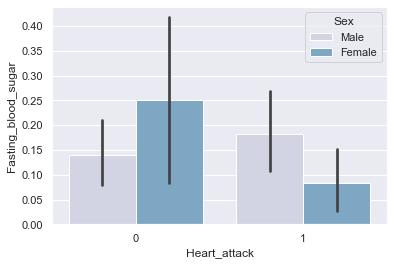

In [145]:
sns.barplot(x='Heart_attack', y='Fasting_blood_sugar', data=df_cleveland, hue='Sex', palette=sns.color_palette("PuBu", 3))

###### fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [146]:
sort_by_fasting_blood_sugar = df_cleveland.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_fasting_blood_sugar.head().style.background_gradient(cmap='PuBu')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


This shows relation of Fasting blood sugar with Heart attack in case of Male and Females.

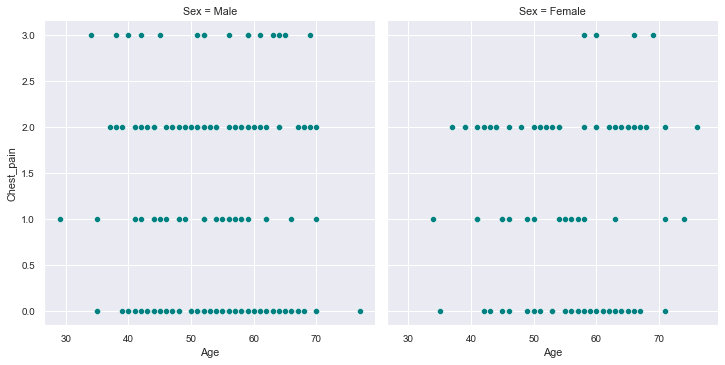

In [147]:
sns.set(font_scale=0.9) # change the font size for the next plots

sns.relplot(x ='Age', y ='Chest_pain', col = 'Sex', data = df_cleveland, color="teal", height = 5)

Relationship between Chest pain, Age and Sex.

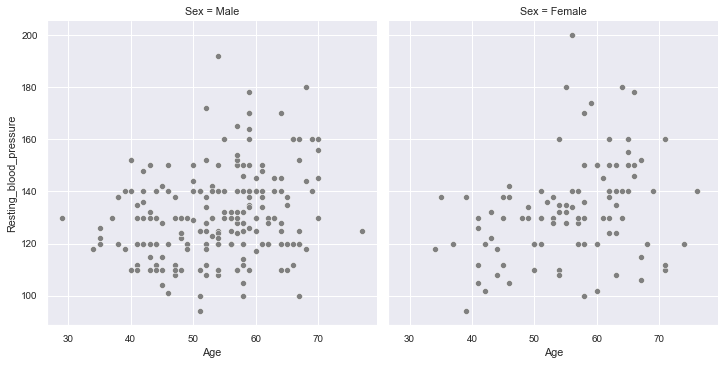

In [148]:
sns.relplot(x ='Age', y ='Resting_blood_pressure', col = 'Sex', data = df_cleveland, color = 'grey')

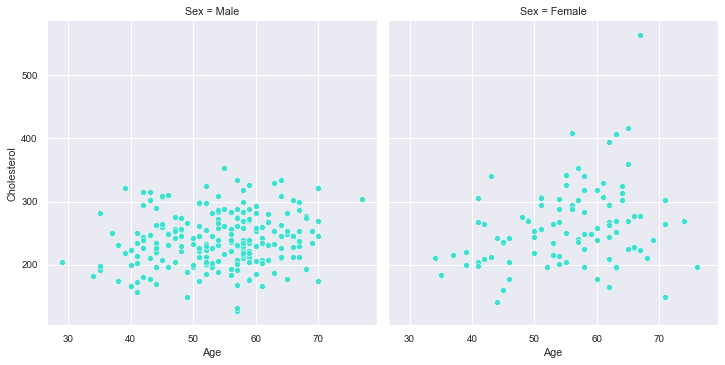

In [149]:
sns.relplot(x ='Age', y ='Cholesterol', col = 'Sex', data = df_cleveland, color = 'turquoise')

Relationship between Cholesterol, Age and Sex.

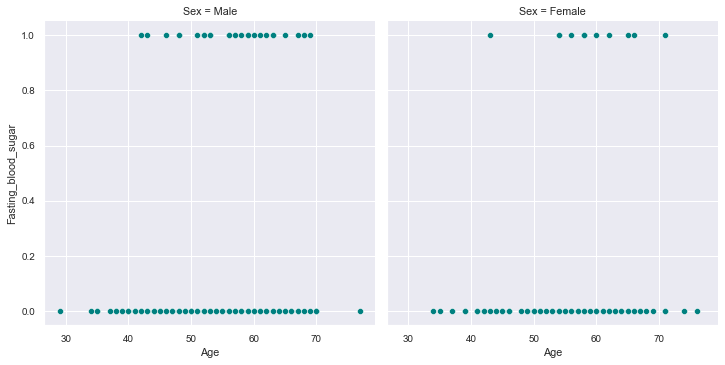

In [150]:
sns.relplot(x ='Age', y ='Fasting_blood_sugar', col = 'Sex', data = df_cleveland, color = 'teal')

Relationship between Fasting Blood Sugar, Age and Sex.

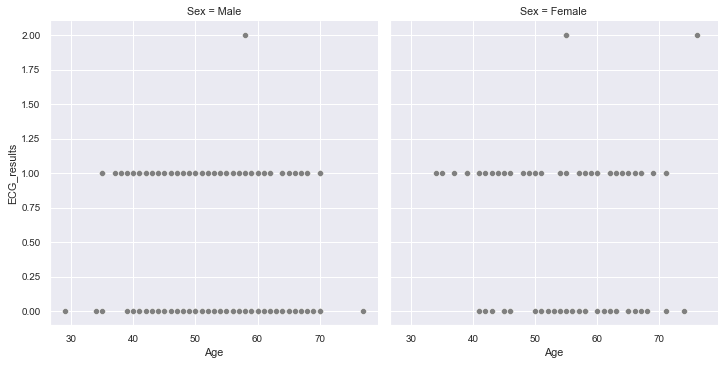

In [151]:
sns.relplot(x ='Age', y ='ECG_results', col = 'Sex', data = df_cleveland, color = 'grey')

Relationship between ECG Results, Age and Sex.

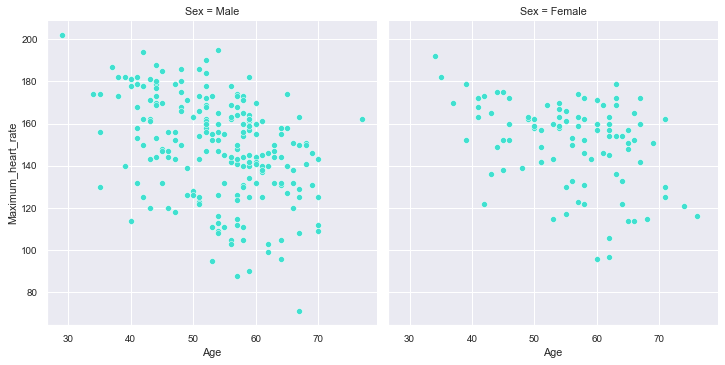

In [152]:
sns.relplot(x ='Age', y ='Maximum_heart_rate', col = 'Sex', data = df_cleveland, color = 'turquoise')

Relationship between Maximum Heart Rate, Age and Sex.

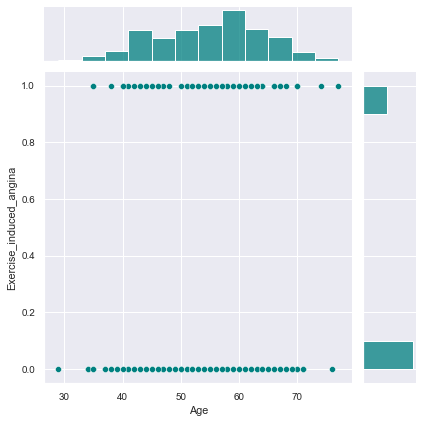

In [153]:
sns.jointplot(x =df_cleveland['Age'], y =df_cleveland['Exercise_induced_angina'], data = df_cleveland, color = 'teal')

Relationship between Exercise Induced Angina and Age. The Age peaks at about 60 and Exercise Induced Angina problem is more at value 0.

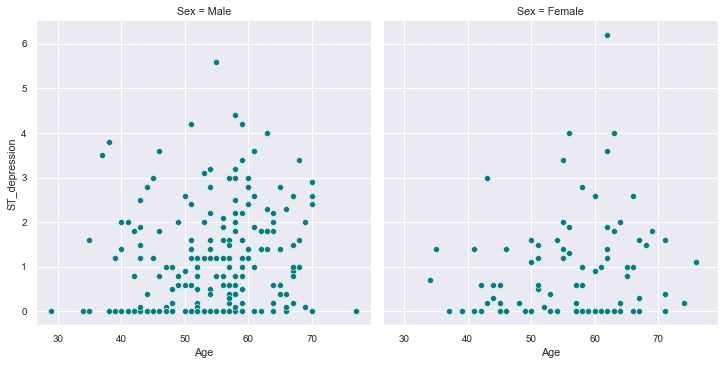

In [154]:
sns.relplot(x ='Age', y ='ST_depression', col = 'Sex', data = df_cleveland, color = 'teal')

Relationship between ST_depression, Age and Sex.

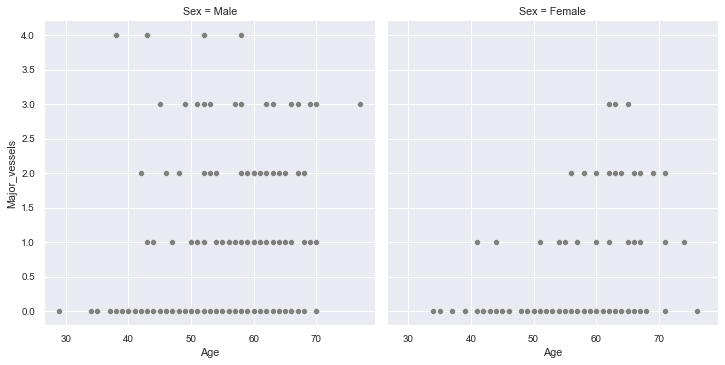

In [155]:
sns.relplot(x ='Age', y ='Major_vessels', col = 'Sex', data = df_cleveland, color = 'grey')

Relationship between Major_vessels, Age and Sex.

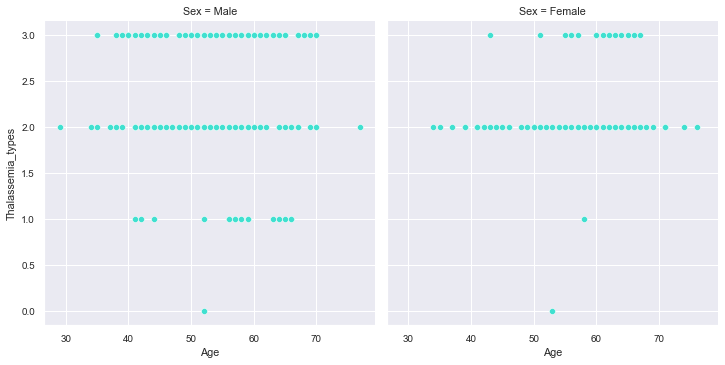

In [156]:
sns.relplot(x ='Age', y ='Thalassemia_types', col = 'Sex', data = df_cleveland, color = 'turquoise')

Relationship between Thalassemia type, Age and Sex.

### 3.1.2. Machine Learning Cleveland dataset <a class="anchor" id="section3.1.2"></a>

First we will need to decide which parameters we will be modeling on.


In [157]:
X_data = data_cleveland.drop('Heart_attack',axis=1)
y_data = data_cleveland['Heart_attack']

In [158]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= .2, random_state=10) # split the data

In some train_test splits, we are able to get an accuracy for 100% for some of these model types. Therefore, we are going to perform repeated trainings of the algorithm by resampling, and average out the scores to determine which algorithm performs the best.

In [159]:
scores = pd.DataFrame(columns = ['Test Type','Accuracy','F1'])

In [160]:
for rand in range(10):
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=rand)
    
    #Perform normalization
    scaler = StandardScaler()
    
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    #Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Logistic Regression',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict)]
    
    #Decision Tree
    model = DecisionTreeClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Decision Tree',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict)]
    
    #Random Forest
    model = RandomForestClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Random Forest',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict)]
    
    #KNN
    model = KNeighborsClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['KNN',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict)]

In [161]:
scores.groupby('Test Type').mean()

,Accuracy,F1
Test Type,,
Decision Tree,0.770492,0.792233
KNN,0.814754,0.835790
Logistic Regression,0.836066,0.855520
Random Forest,0.840984,0.859892


The Random Forest gives good Accuracy and F1 score. 

In [162]:
# Model
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

We can plot the consequent decision tree, to see what it's doing

In [163]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

#### Visualize a Decision Tree from a Random Forest in Python

In [164]:
# code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'], shell=True)

# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

1

Let's evaluate the model

In [165]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

Assess the fit with a confusion matrix

In [166]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[18,  5],
       [ 7, 31]], dtype=int64)

      True Negative = 28
      False Positive = 8
      False Negative = 5
      True Positive = 21

Diagnostic tests are often defined with sensitivity and specificity as the headline metrics. **Sensitivity** is the metric that evaluates a model’s ability to predict true positives of each available category. **Specificity** is the metric that evaluates a model’s ability to predict true negatives of each available category. These metrics apply to any categorical model. The equations for calculating these metrics are below.

\begin{align}
Sensitivity = \frac{True\:Positives}{True\:Positives + False\:Negatives}
\end{align}

\begin{align}
Specificity = \frac{True\:Negatives}{True\:Negatives + False\:Positives}
\end{align}

In [167]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.72
Specificity :  0.8611111111111112


Expected Output:

 - Sensitivity :  0.75

 - Specificity :  0.86

Let's also check with a [Receiver Operator Curve (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic),

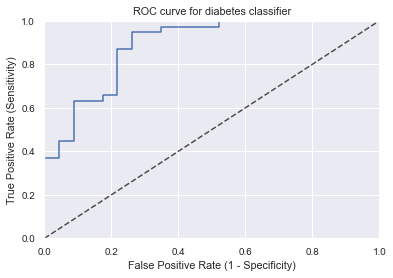

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the **Area Under the Curve(AUC)**. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows:

    0.90 - 1.00 = excellent
    0.80 - 0.90 = good
    0.70 - 0.80 = fair
    0.60 - 0.70 = poor
    0.50 - 0.60 = fail

In [169]:
auc(fpr, tpr)

0.8867276887871853

Expected Output

- 0.9142857142857144

### 3.1.3. Model Validation Cleveland dataset <a class="anchor" id="section3.1.3"></a>

ML explainability tools

**Permutation importance** is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more [here](https://www.kaggle.com/dansbecker/permutation-importance).

In [170]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0426 ± 0.0642,Chest_pain
0.0328 ± 0.0549,Major_vessels
0.0230 ± 0.0334,Thalassemia_types
0.0131 ± 0.0245,Exercise_induced_angina
0 ± 0.0000,ECG_results
0 ± 0.0000,Fasting_blood_sugar
0 ± 0.0000,Cholesterol
0 ± 0.0000,Resting_blood_pressure
-0.0033 ± 0.0245,ST_slope
-0.0033 ± 0.0131,Age


So, it seems that the most important factor in terms of permutation is chest pain result, another general factor might be the age. 

Let's take a closer look at the nimber of major vessels using a **Partial Dependence Plot** (more [here](https://www.kaggle.com/dansbecker/partial-plots)). These plots vary a single variable in a single row across a range of values and see what effect it has on the outcome. It does this for several rows and plots the average effect. Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation importance list

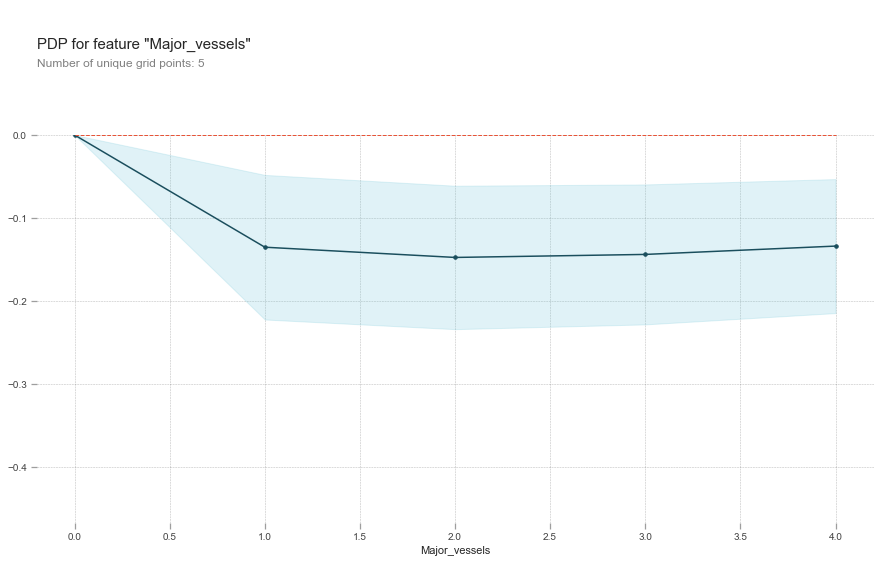

In [171]:
base_features = data_cleveland.columns.values.tolist()
base_features.remove('Heart_attack')

feat_name = 'Major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

As we can see that as the number of major blood vessels increases, the probability of heart disease decreases which makes sense, as it means more blood can get to the heart.

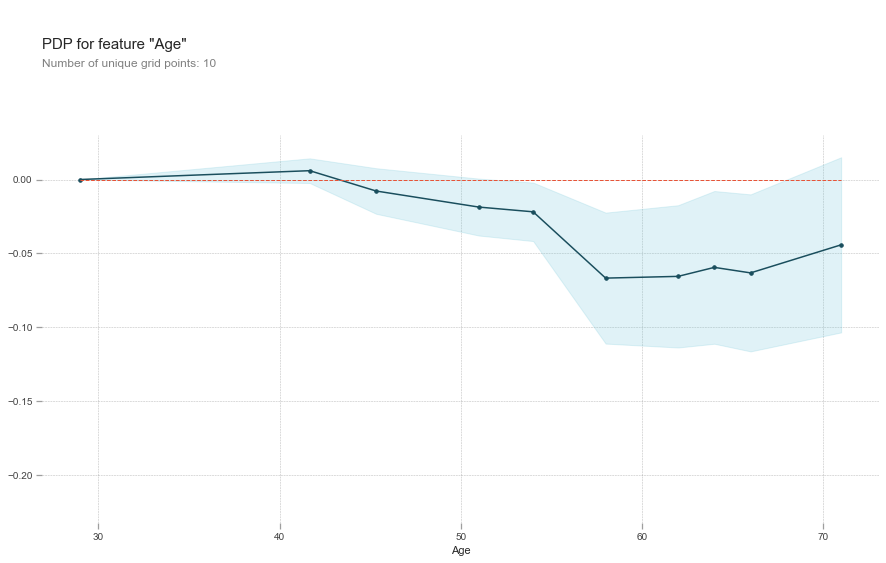

In [172]:
feat_name = 'Age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

That's a bit strange. The higher the age, the lower the chance of heart disease? Althought the blue confidence regions show that this might not be true (the red baseline is within the blue zone)

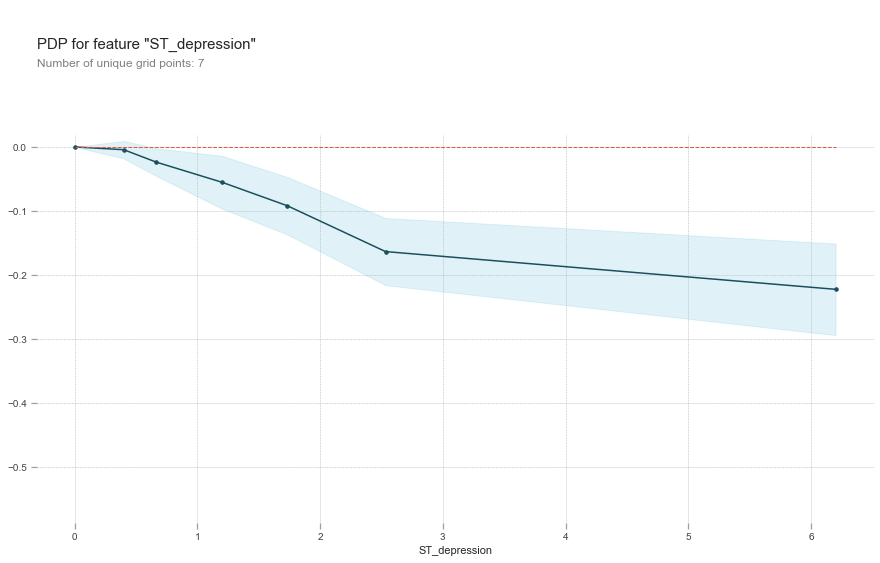

In [173]:
feat_name = 'ST_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


Those values also shows a reduction in probability the higher it goes.

What is the ST segment in an electrocardiogram (ECG)? (find more [here](https://www.sharecare.com/health/circulatory-system-health/what-st-segment-electrocardiogram-ecg)) The ST segment represents the heart's electrical activity immediately after the right and left ventricles have contracted, pumping blood to the lungs and the rest of the body. Following this big effort, ventricular muscle cells relax and get ready for the next contraction.

**The shape and direction of the ST segment are far more important than its length. Upward or downward shifts can represent decreased blood flow to the heart from a variety of causes, including heart attack.**

So, this variable, which is described as 'ST depression induced by exercise relative to rest', seems to suggest the higher the value the higher the probability of heart disease, but the plot above shows the opposite.


## 3.2. Heart Disease Hungarian dataset Analysis <a class="anchor" id="section3.2"></a>
#### Hungarian Institute of Cardiology

In [174]:
# The head method operates on a dataframe by displaying a number of rows. The first 5 rows are displayed if no arguments are passed.
data_hungarian.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,140,289,0,0,172,0,0.0,0,0,0,0
1,49,0,3,160,180,0,0,156,0,1.0,2,0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,0,0,0,0
3,48,0,4,138,214,0,0,108,1,1.5,2,0,0,3
4,54,1,3,150,0,0,0,122,0,0.0,0,0,0,0
5,39,1,3,120,339,0,0,170,0,0.0,0,0,0,0
6,45,0,2,130,237,0,0,170,0,0.0,0,0,0,0
7,54,1,2,110,208,0,0,142,0,0.0,0,0,0,0
8,37,1,4,140,207,0,0,130,1,1.5,2,0,0,1
9,48,0,2,120,284,0,0,120,0,0.0,0,0,0,0


In [175]:
n_rows, n_cols = data_hungarian.shape
print(f"There exists {n_rows} domain instances with {n_cols} features in the dataset.")

There exists 294 domain instances with 14 features in the dataset.


In [176]:
# Let's see the names of columns
data_hungarian.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Measures of shape describe the distribution of the data within this dataset. These distributions show the spread (dispersion, variability, scatter) of the data.

In [177]:
data_hungarian.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.132653,231.224490,0.068027,0.217687,138.656463,0.302721,0.586054,0.670068,0.030612,0.537415,0.792517
std,7.811812,0.447533,0.965117,19.220459,93.655333,0.252222,0.460257,24.908180,0.460219,0.908648,0.929231,0.524891,1.730166,1.237006
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


Statisctial Details Describe provides us with statistical in numerical format about the specific details of each of the columns. We can deduct that in age column the minimum age is 28 years and maximum is 66 years mean of age is 47 years. The quantities details are given in form of 25%, 50% and 75%. The data is divided into 3 quarties of 4 eaqul parts. Those statistical measures give us an idea of the central tendency of the data set. However, mean is effected by outliers and hence we need more information to make accurate decisions.

In [178]:
data_hungarian.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

The dataset doesn't have missing information/ no null values.

In [179]:
print(data_hungarian.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    int64  
 4   chol      294 non-null    int64  
 5   fbs       294 non-null    int64  
 6   restecg   294 non-null    int64  
 7   thalach   294 non-null    int64  
 8   exang     294 non-null    int64  
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    int64  
 11  ca        294 non-null    int64  
 12  thal      294 non-null    int64  
 13  target    294 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.3 KB
None


Let's rename the column headers for better understanding and visualization.

In [180]:
data_hungarian.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','slope':'ST_slope','target':'Heart_attack'}, inplace = True)

In [181]:
df_hungarian = data_hungarian.copy() # default dataset copy

In [182]:
# Check of the changes
df_hungarian.dtypes

Age                          int64
Sex                          int64
Chest_pain                   int64
Resting_blood_pressure       int64
Cholesterol                  int64
Fasting_blood_sugar          int64
ECG_results                  int64
Maximum_heart_rate           int64
Exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
Major_vessels                int64
Thalassemia_types            int64
Heart_attack                 int64
dtype: object

Let's replace some of the columns as these will make the understanding of visualizations better instead of numeric values.

In [183]:
df_hungarian['Sex'].replace({1:'Male', 0:'Female'}, inplace=True)
df_hungarian['Sex'] = df_hungarian['Sex'].astype('object')

### 3.2.1. Corelations Hungarian dataset <a class="anchor" id="section3.2.1"></a>

<AxesSubplot:>

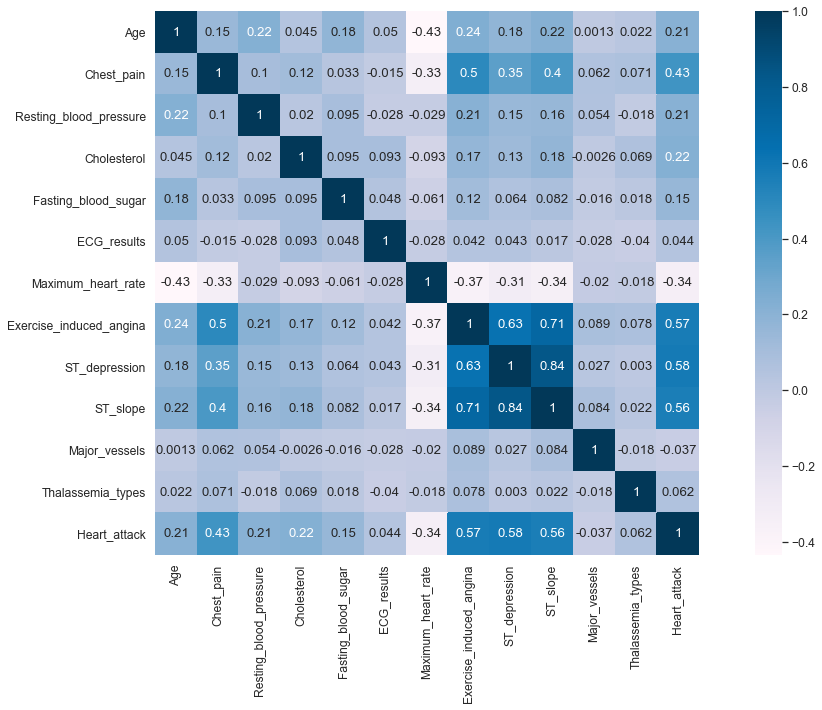

In [184]:
plt.figure(figsize=(20,10))
cm = df_hungarian.corr()
sns.set(font_scale=1.1)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            cmap='PuBu')


This time there is a positive correlation between Chest pain, Exercise induced angina and Heart attack. We can see a lot of similarities between Cleveland and Hungarian datasets. However, there are some obvious changes Maximum heart rate is in the negative group; ST slope and ST depression are in the positive group. 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Chest_pain'}>],
       [<AxesSubplot:title={'center':'Resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'Fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'ECG_results'}>],
       [<AxesSubplot:title={'center':'Maximum_heart_rate'}>,
        <AxesSubplot:title={'center':'Exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'ST_depression'}>,
        <AxesSubplot:title={'center':'ST_slope'}>],
       [<AxesSubplot:title={'center':'Major_vessels'}>,
        <AxesSubplot:title={'center':'Thalassemia_types'}>],
       [<AxesSubplot:title={'center':'Heart_attack'}>, <AxesSubplot:>]],
      dtype=object)

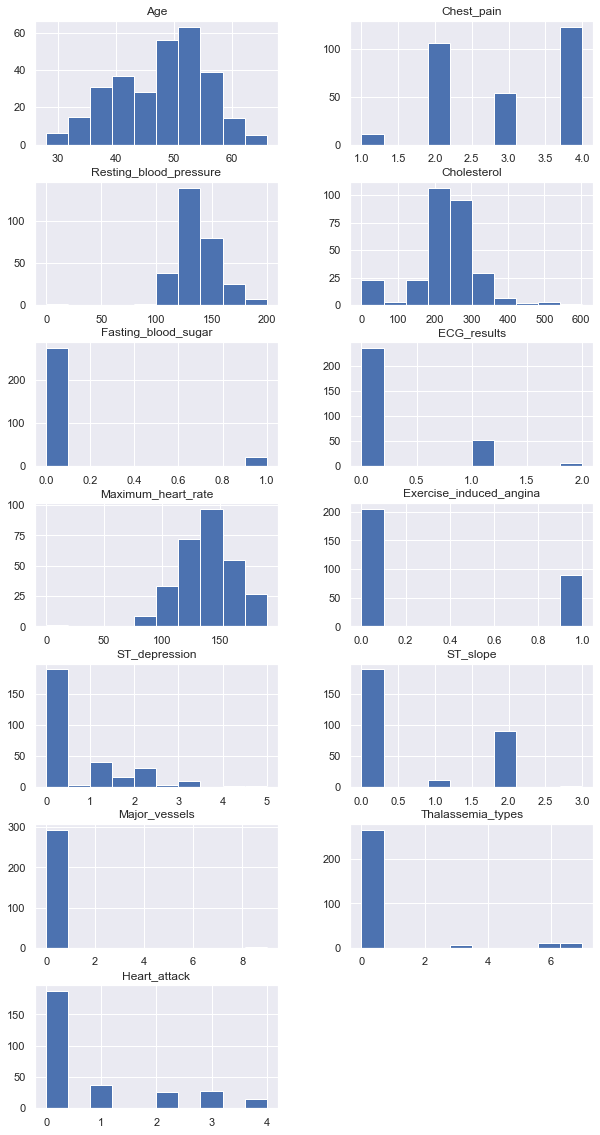

In [185]:
# Dataset histogram
sns.set(font_scale=1)
df_hungarian.hist(figsize=(10,20), layout=(7,2))

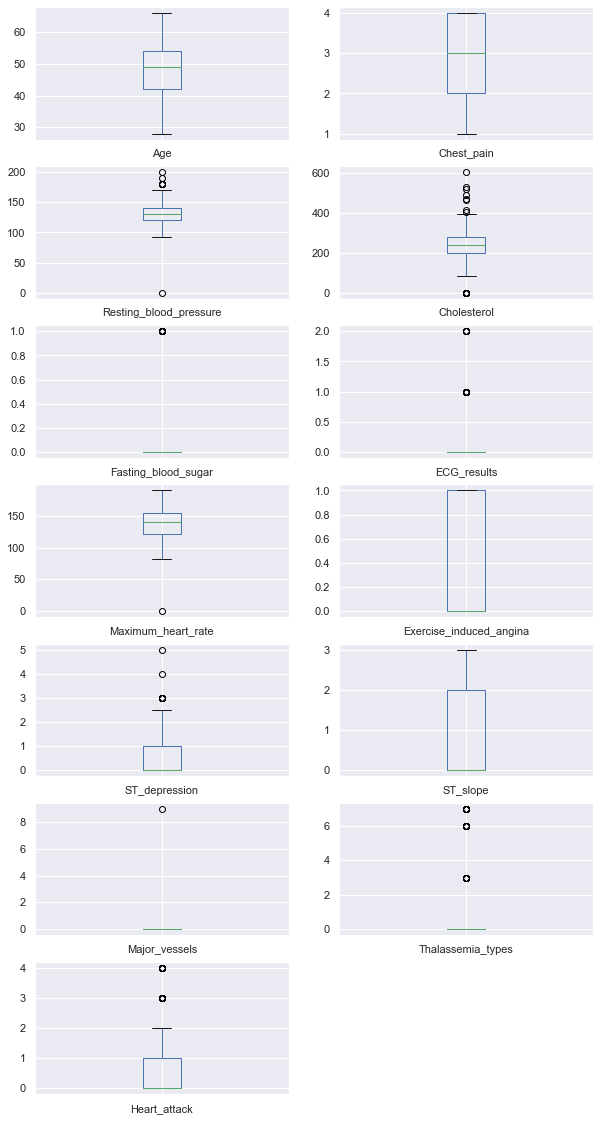

In [186]:
# Box and whiskers plot
df_hungarian.plot(kind='box', subplots=True, layout=(7,2), figsize=(10,20))
plt.show()

In this dataset Thalassemia types don't have a huge effect. Although, there are changes in the Exercise induced angina nad Cholesterol level.

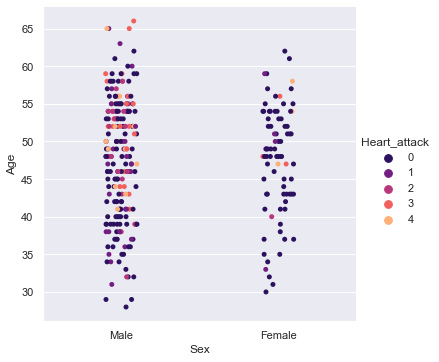

In [187]:
sns.catplot(data=df_hungarian, x='Sex', y='Age', hue='Heart_attack', palette='magma', legend=True) # target presents having or not having heart diseases


This plot describes that the higher levels (4) of heart attack is definitely in the group of males. Let's observe what is the diversity in this dataset. 

In [188]:
df_hungarian['Sex'].value_counts()

Male      213
Female     81
Name: Sex, dtype: int64

Output: 213 males and 81 females

**Note** By this part of the analysis we will look through the major changes of plots. We will go through Cholesterol level, ST depression, Exercise induced angina.

There is a huge gap from the outliers in the dataset. Let's try to clean it.

In [189]:
df_hungarian['Fasting_blood_sugar'].value_counts()

0    274
1     20
Name: Fasting_blood_sugar, dtype: int64

Output: 0 = 274, 1 = 20

<AxesSubplot:xlabel='Heart_attack', ylabel='Fasting_blood_sugar'>

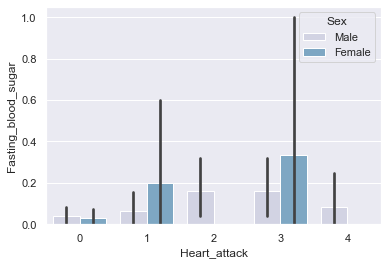

In [190]:
sns.barplot(x='Heart_attack', y='Fasting_blood_sugar', data=df_hungarian, hue='Sex', palette=sns.color_palette("PuBu", 3))

Female patients have higher level of fasting blood glucose than the male one.

In [191]:
sort_by_cholesterol = df_hungarian.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_cholesterol.head(10).style.background_gradient(cmap='Blues')

,Sex,Cholesterol,Heart_attack
67,Male,0,16
0,Female,0,7
129,Male,246,4
113,Male,224,4
142,Male,263,4
92,Male,196,4
153,Male,275,4
118,Male,230,3
147,Male,268,3
141,Male,260,3


The increase cholesterol levels don't show that dramatic changes from this dataset, especially for the females.

In [192]:
sort_by_st_depression = df_hungarian.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_st_depression.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
6,Male,0.000000,133
0,Female,0.000000,56
8,Male,1.000000,29
10,Male,2.000000,24
3,Female,1.000000,12
9,Male,1.500000,12
12,Male,3.000000,9
5,Female,2.000000,7
4,Female,1.500000,4
11,Male,2.500000,3


It shows almost the same results as the previous dataset. The lower the depression, the higher the cases were for heart attack.

### 3.2.2 Machine Learing Hungarian dataset <a class="anchor" id="section3.2.2"></a>

First we will need to decide which parameter which we are going to use.

In [193]:
# Selected feature

X_data = data_hungarian.drop('Heart_attack',axis=1)
y_data = data_hungarian['Heart_attack']

In [194]:
scores = pd.DataFrame(columns = ['Test Type','Accuracy','F1'])

In [195]:
for rand in range(10):
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=rand)
    
    #Perform normalization
    scaler = StandardScaler()
    
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    #Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Logistic Regression',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #Decision Tree
    model = DecisionTreeClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Decision Tree',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #Random Forest
    model = RandomForestClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Random Forest',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #KNN
    model = KNeighborsClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['KNN',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]

In [196]:
scores.groupby('Test Type').mean()

,Accuracy,F1
Test Type,,
Decision Tree,0.598305,0.598305
KNN,0.689831,0.689831
Logistic Regression,0.691525,0.691525
Random Forest,0.689831,0.689831


It seems Random Forest has the better accuracy.

In [197]:
# Model
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

Let's evaluate the model once again.

In [198]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [199]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

Assess the fit with a confusion matrix

In [200]:
# Issue confusion_matrix method has been shadowed by the DataFrame
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[39,  0,  0,  1,  0],
       [ 5,  1,  1,  2,  0],
       [ 1,  1,  1,  0,  0],
       [ 1,  1,  0,  1,  0],
       [ 2,  0,  0,  2,  0]], dtype=int64)

### 3.2.3. Model Validation Hungarian dataset <a class="anchor" id="section3.2.3"></a>

ML explainability tools

**Permutation importance** is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more [here](https://www.kaggle.com/dansbecker/permutation-importance).

In [201]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0305 ± 0.0136,Sex
0.0237 ± 0.0346,Exercise_induced_angina
0.0237 ± 0.0271,Maximum_heart_rate
0.0203 ± 0.0395,Chest_pain
0.0102 ± 0.0346,Age
0.0068 ± 0.0346,ST_slope
0.0068 ± 0.0166,Thalassemia_types
0.0068 ± 0.0166,ST_depression
0.0068 ± 0.0166,Cholesterol
0.0034 ± 0.0136,Fasting_blood_sugar


So, it seems that the most important factor in terms of permutation are the Maximum heart rate, Gender and Chest pain, another general factor might be the age.

Let's take a closer look at the nimber of major vessels using a **Partial Dependence Plot** (more [here](https://www.kaggle.com/dansbecker/partial-plots)). These plots vary a single variable in a single row across a range of values and see what effect it has on the outcome. It does this for several rows and plots the average effect. Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation importance list

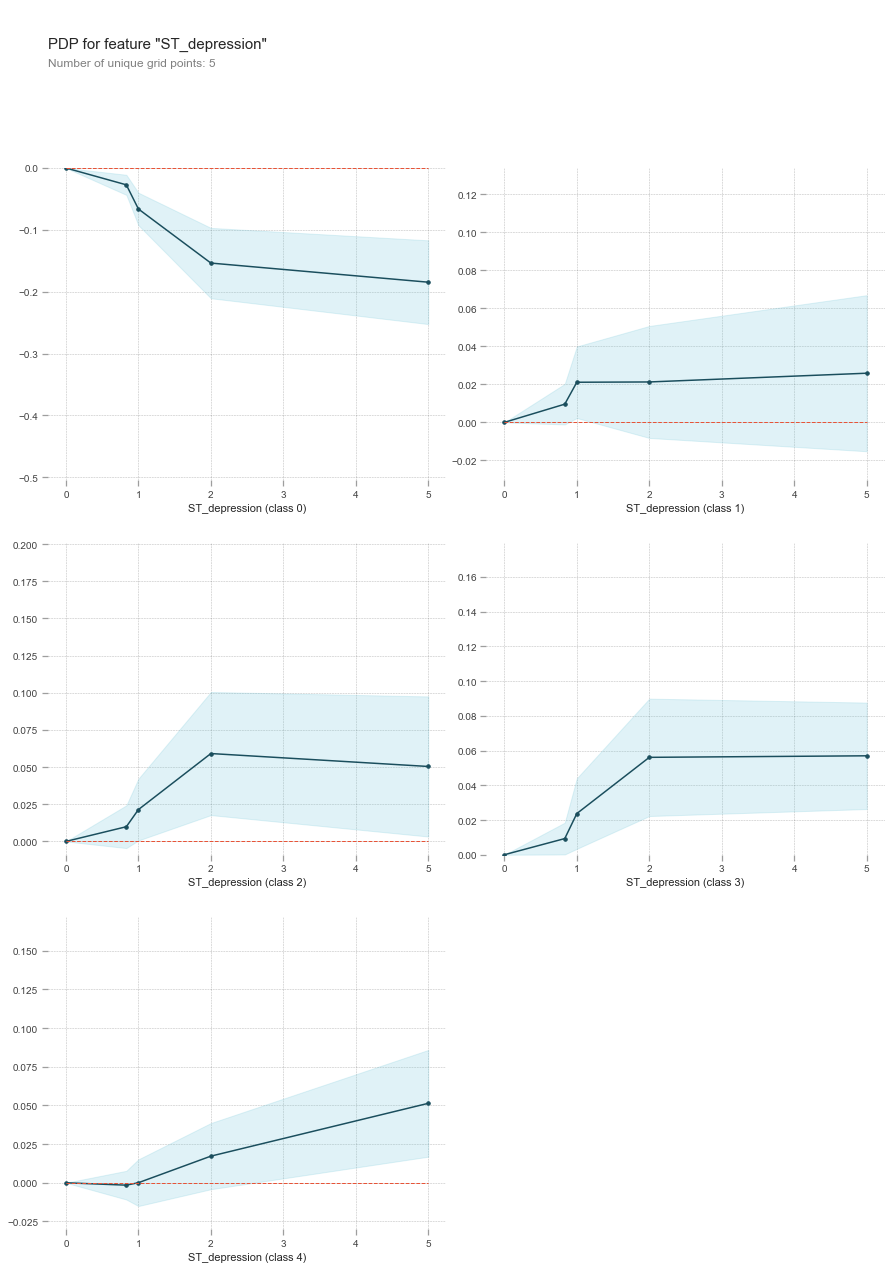

In [202]:
base_features = data_cleveland.columns.values.tolist()
base_features.remove('Heart_attack')

feat_name = 'ST_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

As we can see depending on the class, if you are in the risk groups (1, ..4) means having a heart disease, the ST depression levels are going higher.

## 3.3. Heart Disease Switzerland dataset Analysis <a class="anchor" id="section3.3"></a>

#### University Hospital, Zurich & Basel, Switzerland:

In [203]:
# The head method operates on a dataframe by displaying a number of rows. The first 5 rows are displayed if no arguments are passed.
data_switzerland.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
5,38,0,4,110.0,0,0.0,0.0,156.0,0.0,0.0,2.0,NaN,3.0,1
6,38,1,3,100.0,0,NaN,0.0,179.0,0.0,-1.1,1.0,NaN,NaN,0
7,38,1,3,115.0,0,0.0,0.0,128.0,1.0,0.0,2.0,NaN,7.0,1
8,38,1,4,135.0,0,NaN,0.0,150.0,0.0,0.0,NaN,NaN,3.0,2
9,38,1,4,150.0,0,NaN,0.0,120.0,1.0,NaN,NaN,NaN,3.0,1


**Note** We have a lot of missing values. Let's take closer look if it's worth it to work with this dataset. We should drop few columns **fbs**,**ca**,**thal**, **chol** and imputate the missing from **slope**, **oldpeak**, **trestbps** and **restecg**.

In [204]:
# Drop Columns with Missing Values
data_switzerland = data_switzerland.drop(['fbs','ca','thal','chol'], axis=1)

Next, we use **SimpleImputer** to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as regression imputation, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [205]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
data_switzerland = pd.DataFrame(my_imputer.fit_transform(data_switzerland))

data_switzerland.columns = ['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'target']

In [206]:
data_switzerland.head(100)

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,target
0,32.0,1.0,1.0,95.000000,0.000000,127.0,0.0,0.700000,1.000000,1.0
1,34.0,1.0,4.0,115.000000,0.360656,154.0,0.0,0.200000,1.000000,1.0
2,35.0,1.0,4.0,130.206612,0.000000,130.0,1.0,0.653846,1.801887,3.0
3,36.0,1.0,4.0,110.000000,0.000000,125.0,1.0,1.000000,2.000000,1.0
4,38.0,0.0,4.0,105.000000,0.000000,166.0,0.0,2.800000,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...
95,62.0,1.0,3.0,160.000000,0.000000,72.0,1.0,0.000000,2.000000,3.0
96,62.0,1.0,4.0,115.000000,0.000000,128.0,1.0,2.500000,3.000000,2.0
97,62.0,1.0,4.0,115.000000,0.000000,72.0,1.0,-0.500000,2.000000,1.0
98,62.0,1.0,4.0,150.000000,1.000000,78.0,0.0,2.000000,2.000000,3.0


In [207]:
n_rows, n_cols = data_switzerland.shape
print(f"There exists {n_rows} domain instances with {n_cols} features in the dataset.")

There exists 123 domain instances with 10 features in the dataset.


In [208]:
# Let's see the names of columns
data_switzerland.columns

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'target'],
      dtype='object')

Measures of shape describe the distribution of the data within this dataset. These distributions show the spread (dispersion, variability, scatter) of the data.

Let's rename the column headers for better understanding and visualization.

In [209]:
data_switzerland.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','slope':'ST_slope','target':'Heart_attack'}, inplace = True)

In [210]:
data_switzerland.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Heart_attack
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,55.317073,0.918699,3.699187,130.206612,0.360656,121.557377,0.442623,0.653846,1.801887,1.804878
std,9.032108,0.274414,0.688726,22.373476,0.587654,25.870754,0.496697,1.029765,0.578577,1.013503
min,32.000000,0.000000,1.000000,80.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,51.000000,1.000000,4.000000,115.000000,0.000000,104.500000,0.000000,0.000000,1.000000,1.000000
50%,56.000000,1.000000,4.000000,130.000000,0.000000,121.000000,0.000000,0.500000,2.000000,2.000000
75%,61.500000,1.000000,4.000000,145.000000,1.000000,140.000000,1.000000,1.450000,2.000000,3.000000
max,74.000000,1.000000,4.000000,200.000000,2.000000,182.000000,1.000000,3.700000,3.000000,4.000000


Statisctial Details Describe provides us with statistical in numerical format about the specific details of each of the columns. We can deduct that in age column the minimum age is 32 years and maximum is 74 years mean of age is 55 years. The quantities details are given in form of 25%, 50% and 75%. The data is divided into 3 quarties of 4 eaqul parts. Those statistical measures give us an idea of the central tendency of the data set. However, mean is effected by outliers and hence we need more information to make accurate decisions.

In [211]:
data_switzerland.isnull().any()

Age                        False
Sex                        False
Chest_pain                 False
Resting_blood_pressure     False
ECG_results                False
Maximum_heart_rate         False
Exercise_induced_angina    False
ST_depression              False
ST_slope                   False
Heart_attack               False
dtype: bool

In [212]:
df_switzerland = data_switzerland.copy() # default dataset copy

In [213]:
# Check of the changes
df_switzerland.dtypes

Age                        float64
Sex                        float64
Chest_pain                 float64
Resting_blood_pressure     float64
ECG_results                float64
Maximum_heart_rate         float64
Exercise_induced_angina    float64
ST_depression              float64
ST_slope                   float64
Heart_attack               float64
dtype: object

Let's replace some of the columns as these will make the understanding of visualizations better instead of numeric values.

In [214]:
df_switzerland['Sex'].replace({1:'Male', 0:'Female'}, inplace=True)
df_switzerland['Sex'] = df_switzerland['Sex'].astype('object')

### 3.3.1. Corelations Switzerland dataset <a class="anchor" id="section3.3.1"></a>

<AxesSubplot:>

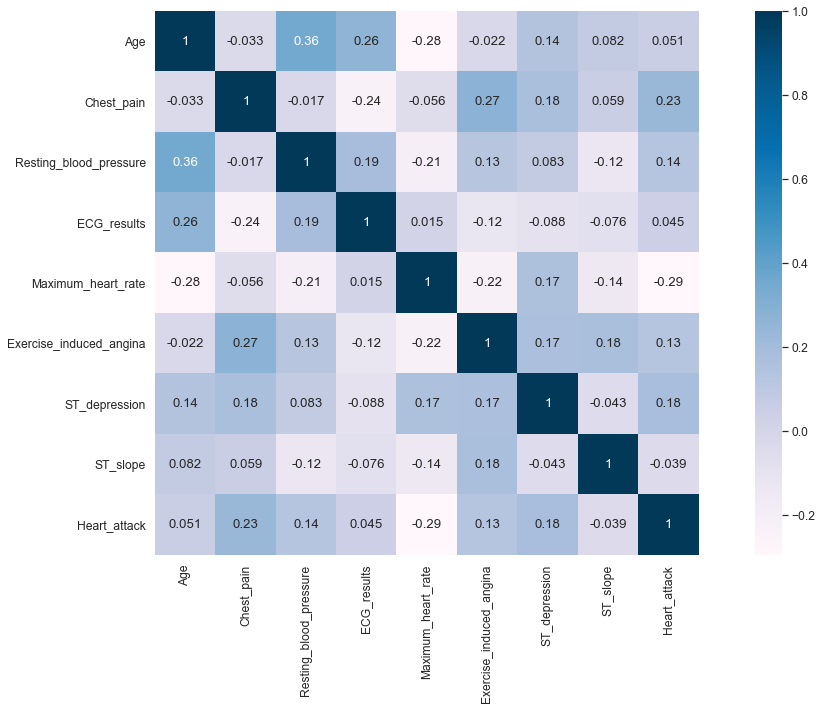

In [215]:
plt.figure(figsize=(20,10))
cm = df_switzerland.corr()
sns.set(font_scale=1.1)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            cmap='PuBu')


There isn't that much correlation, except between the negative Maximum heart rate, ST slope and Heart attack, everything else seems to be in norms.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Chest_pain'}>],
       [<AxesSubplot:title={'center':'Resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'ECG_results'}>],
       [<AxesSubplot:title={'center':'Maximum_heart_rate'}>,
        <AxesSubplot:title={'center':'Exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'ST_depression'}>,
        <AxesSubplot:title={'center':'ST_slope'}>],
       [<AxesSubplot:title={'center':'Heart_attack'}>, <AxesSubplot:>]],
      dtype=object)

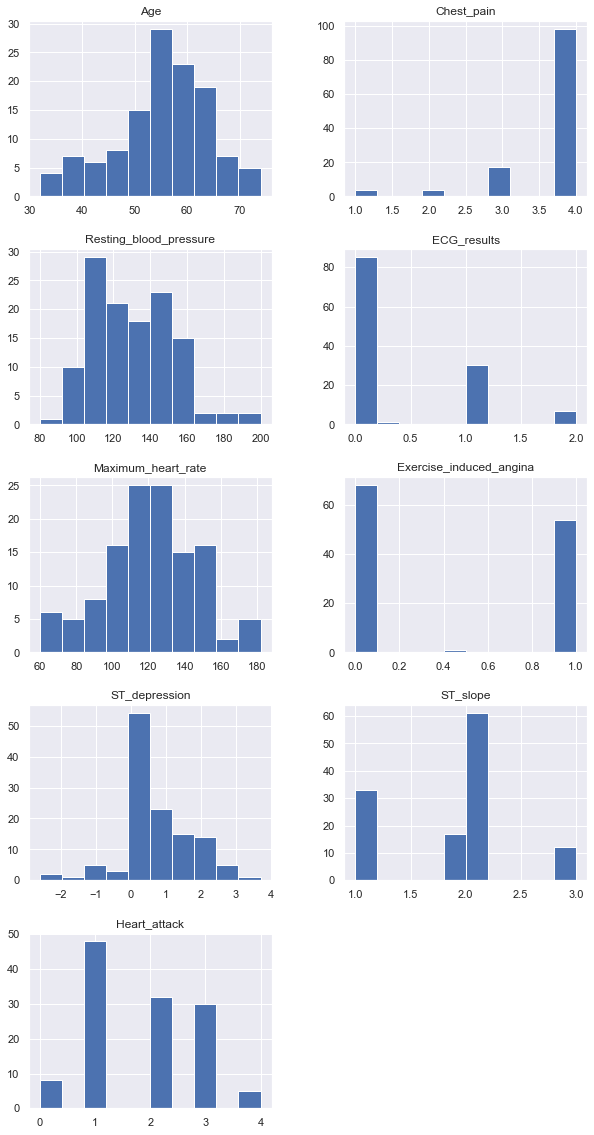

In [216]:
# Dataset histogram
sns.set(font_scale=1)
df_switzerland.hist(figsize=(10,20), layout=(5,2))

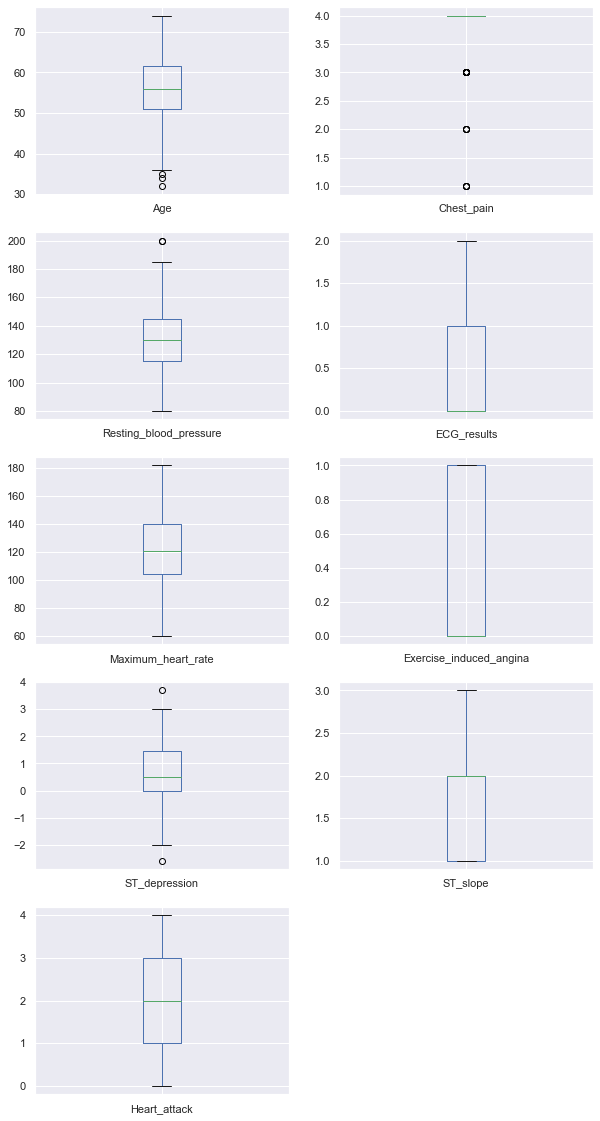

In [217]:
# Box and whiskers plot
df_switzerland.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,20))
plt.show()

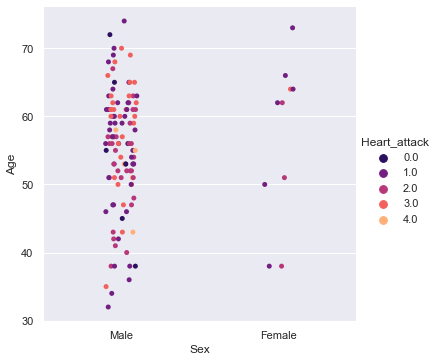

In [218]:
sns.catplot(data=df_switzerland, x='Sex', y='Age', hue='Heart_attack', palette='magma', legend=True) # target presents having or not having heart diseases


It is very clear that the majority of heart disease in Switzerland is in the first gorup of males, but that's understandable where females are only 10% of the cases.

In [219]:
df_switzerland['Sex'].value_counts()

Male      113
Female     10
Name: Sex, dtype: int64

In [220]:
sort_by_st_depression = df_switzerland.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_st_depression.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
16,Male,0.000000,37
32,Male,2.000000,11
25,Male,1.000000,9
22,Male,0.653846,6
0,Female,0.000000,5
21,Male,0.500000,5
29,Male,1.500000,5
23,Male,0.700000,4
19,Male,0.300000,2
31,Male,1.800000,2


It shows almost the same results as the previous dataset. The lower the depression, the higher the cases were for heart attack. However, there are some cases where depression is a risk for a heart disease.

### 3.3.2 Machine Learing Switzerland dataset <a class="anchor" id="section3.3.2"></a>

In [221]:
# Selected feature

X_data = data_switzerland.drop('Heart_attack',axis=1)
y_data = data_switzerland['Heart_attack']

In [222]:
scores = pd.DataFrame(columns = ['Test Type','Accuracy','F1'])

In [223]:
for rand in range(10):
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=rand)
    
    #Perform normalization
    scaler = StandardScaler()
    
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    #Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Logistic Regression',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #Decision Tree
    model = DecisionTreeClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Decision Tree',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #Random Forest
    model = RandomForestClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Random Forest',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #KNN
    model = KNeighborsClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['KNN',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]

In [224]:
scores.groupby('Test Type').mean()

,Accuracy,F1
Test Type,,
Decision Tree,0.300,0.300
KNN,0.372,0.372
Logistic Regression,0.340,0.340
Random Forest,0.424,0.424


It seems like we can find something with Random Forest.

In [225]:
# Model
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

Let's evaluate the model once again.

In [226]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [227]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

Assess the fit with a confusion matrix

In [228]:
# Issue confusion_matrix method has been shadowed by the DataFrame
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[0, 2, 1, 0],
       [0, 7, 4, 0],
       [0, 4, 0, 0],
       [0, 2, 1, 4]], dtype=int64)

### 3.3.3 Model Validation Switzerland dataset <a class="anchor" id="section3.3.3"></a>

ML explainability tools

**Permutation importance** is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more [here](https://www.kaggle.com/dansbecker/permutation-importance).

In [229]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1360 ± 0.0816,Maximum_heart_rate
0.1200 ± 0.0506,ST_depression
0.1040 ± 0.1484,Age
0.0560 ± 0.1085,ST_slope
0.0480 ± 0.0599,ECG_results
0.0320 ± 0.0599,Sex
0.0160 ± 0.0392,Chest_pain
-0.0160 ± 0.0392,Exercise_induced_angina
-0.0240 ± 0.1085,Resting_blood_pressure


So, it seems that the most important factor in terms of permutation are the Maximum heart rate, ST depression and Age, another general factor might be the age.

Let's take a closer look at the nimber of major vessels using a **Partial Dependence Plot** (more [here](https://www.kaggle.com/dansbecker/partial-plots)). These plots vary a single variable in a single row across a range of values and see what effect it has on the outcome. It does this for several rows and plots the average effect. Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation importance list

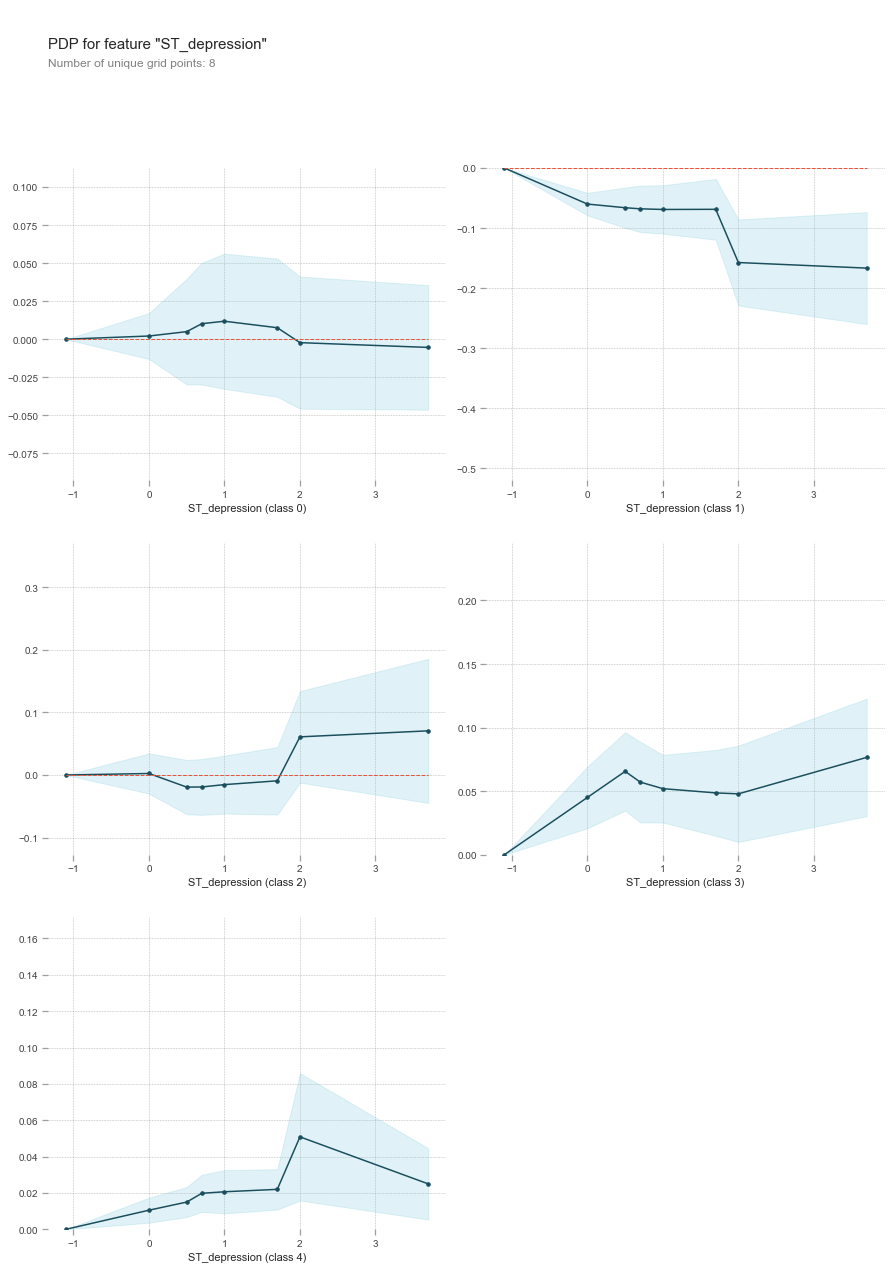

In [230]:
base_features = data_switzerland.columns.values.tolist()
base_features.remove('Heart_attack')

feat_name = 'ST_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Almost in all cases having higher levels of depression cause higher risk of heart attack.

## 3.4. Heart Disease VA dataset Analysis <a class="anchor" id="section3.4"></a>
#### V.A. Long Beach Clinic Foundation

In [231]:
# The head method operates on a dataframe by displaying a number of rows. The first 5 rows are displayed if no arguments are passed.
data_va.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
5,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
6,65,1,4,150.0,236.0,1.0,1,105.0,1.0,0.0,NaN,NaN,NaN,3
7,60,1,3,180.0,0.0,0.0,1,140.0,1.0,1.5,2.0,NaN,NaN,0
8,60,1,3,120.0,0.0,NaN,0,141.0,1.0,2.0,1.0,NaN,NaN,3
9,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,2.0,NaN,NaN,1


**Note** We have a lot of missing values. Let's take closer look if it's worth it to work with this dataset. We should drop few columns **ca**,**thal** and imputate the missing from **trestbps**, **slope**, **oldpeak**, **exang**, **chol**, **fbs**, **thalach**

In [232]:
# Drop Columns with Missing Values
data_va = data_va.drop(['ca','thal'], axis=1)

Next, we use **SimpleImputer** to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as regression imputation, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [233]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
data_va = pd.DataFrame(my_imputer.fit_transform(data_va))

data_va.columns = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'target']

In [234]:
data_va.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63.0,1.0,4.0,140.000000,260.0,0.0,1.0,112.000000,1.000000,3.000000,2.000000,2.0
1,44.0,1.0,4.0,130.000000,209.0,0.0,1.0,127.000000,0.000000,0.000000,2.132653,0.0
2,60.0,1.0,4.0,132.000000,218.0,0.0,1.0,140.000000,1.000000,1.500000,3.000000,2.0
3,55.0,1.0,4.0,142.000000,228.0,0.0,1.0,149.000000,1.000000,2.500000,1.000000,1.0
4,66.0,1.0,3.0,110.000000,213.0,1.0,2.0,99.000000,1.000000,1.300000,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,63.0,1.0,4.0,160.000000,267.0,1.0,1.0,88.000000,1.000000,2.000000,2.132653,3.0
96,35.0,1.0,3.0,133.763889,161.0,0.0,1.0,122.795918,0.646259,1.320833,2.132653,0.0
97,62.0,1.0,1.0,112.000000,258.0,0.0,1.0,150.000000,1.000000,1.320833,2.132653,1.0
98,43.0,1.0,4.0,122.000000,0.0,0.0,0.0,120.000000,0.000000,0.500000,1.000000,1.0


In [235]:
n_rows, n_cols = data_va.shape
print(f"There exists {n_rows} domain instances with {n_cols} features in the dataset.")

There exists 200 domain instances with 12 features in the dataset.


In [236]:
# Let's see the names of columns
data_va.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'target'],
      dtype='object')

Measures of shape describe the distribution of the data within this dataset. These distributions show the spread (dispersion, variability, scatter) of the data.

Let's rename the column headers for better understanding and visualization.

In [237]:
data_va.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','slope':'ST_slope','target':'Heart_attack'}, inplace = True)

In [238]:
data_va.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Heart_attack
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.470440,0.683455,18.835692,0.410940,0.937755,0.466331,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,0.646259,1.320833,2.132653,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.132653,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


Statisctial Details Describe provides us with statistical in numerical format about the specific details of each of the columns. We can deduct that in age column the minimum age is 35 years and maximum is 77 years mean of age is 59 years. The quantities details are given in form of 25%, 50% and 75%. The data is divided into 3 quarties of 4 eaqul parts. Those statistical measures give us an idea of the central tendency of the data set. However, mean is effected by outliers and hence we need more information to make accurate decisions.

In [239]:
data_va.isnull().any()

Age                        False
Sex                        False
Chest_pain                 False
Resting_blood_pressure     False
Cholesterol                False
Fasting_blood_sugar        False
ECG_results                False
Maximum_heart_rate         False
Exercise_induced_angina    False
ST_depression              False
ST_slope                   False
Heart_attack               False
dtype: bool

In [240]:
df_va = data_va.copy() # default dataset copy

In [241]:
# Check of the changes
df_va.dtypes

Age                        float64
Sex                        float64
Chest_pain                 float64
Resting_blood_pressure     float64
Cholesterol                float64
Fasting_blood_sugar        float64
ECG_results                float64
Maximum_heart_rate         float64
Exercise_induced_angina    float64
ST_depression              float64
ST_slope                   float64
Heart_attack               float64
dtype: object

Let's replace some of the columns as these will make the understanding of visualizations better instead of numeric values.

In [242]:
df_va['Sex'].replace({1:'Male', 0:'Female'}, inplace=True)
df_va['Sex'] = df_va['Sex'].astype('object')

### 3.4.1. Corelations VA dataset <a class="anchor" id="section3.4.1"></a>

<AxesSubplot:>

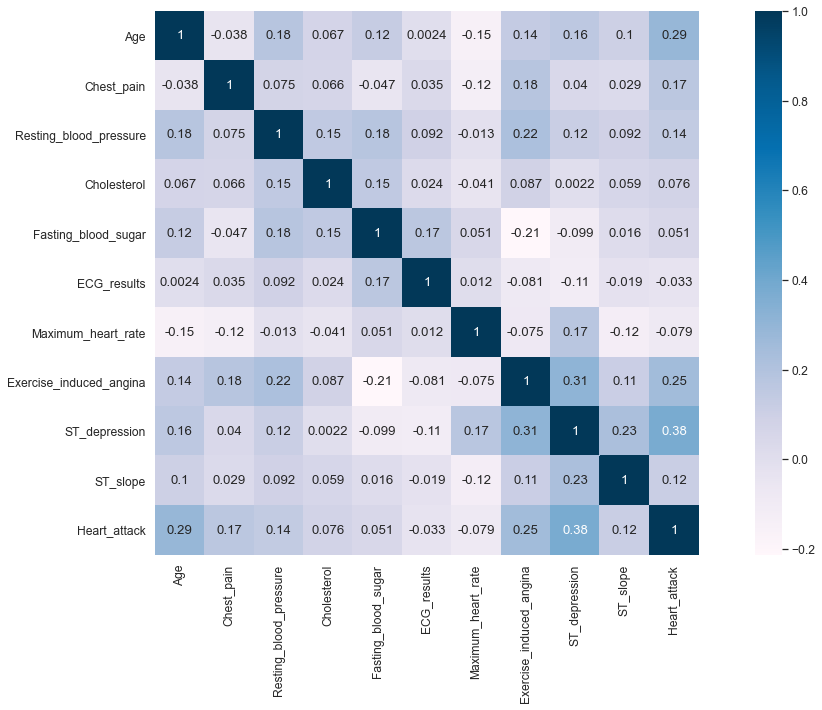

In [243]:
plt.figure(figsize=(20,10))
cm = df_va.corr()
sns.set(font_scale=1.1)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            cmap='PuBu')

This time there is a positive correlation between Age, ST_depression with Heart attack and negative with ECG_results and Maximum induced angina.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Chest_pain'}>],
       [<AxesSubplot:title={'center':'Resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'Fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'ECG_results'}>],
       [<AxesSubplot:title={'center':'Maximum_heart_rate'}>,
        <AxesSubplot:title={'center':'Exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'ST_depression'}>,
        <AxesSubplot:title={'center':'ST_slope'}>],
       [<AxesSubplot:title={'center':'Heart_attack'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

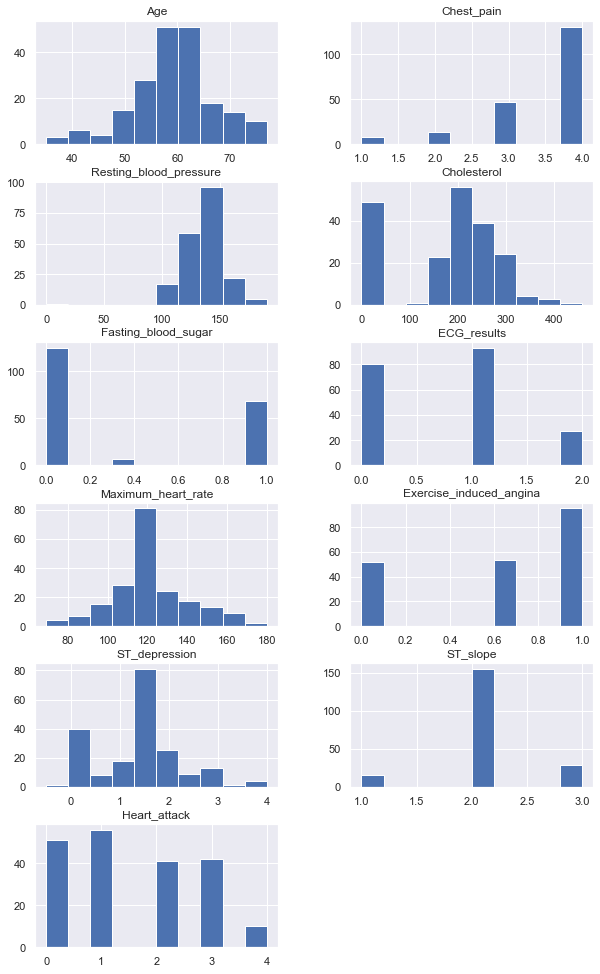

In [244]:
# Dataset histogram
sns.set(font_scale=1)
df_va.hist(figsize=(10,20), layout=(7,2))

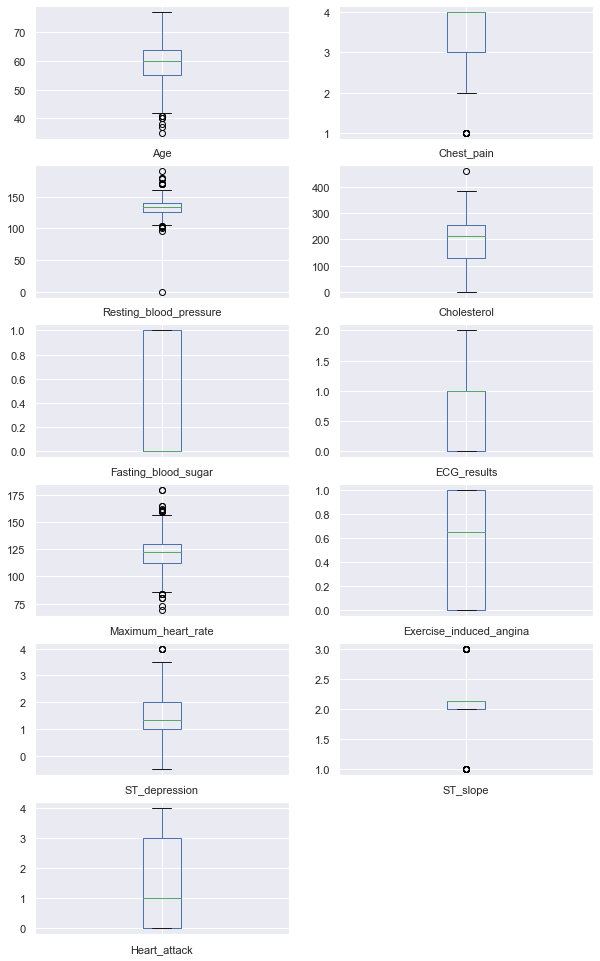

In [245]:
# Box and whiskers plot
df_va.plot(kind='box', subplots=True, layout=(7,2), figsize=(10,20))
plt.show()

In this dataset ST Slope doesn't have a huge effect. Although, there are changes in the Rising blood presure nad Maximum heart rate.

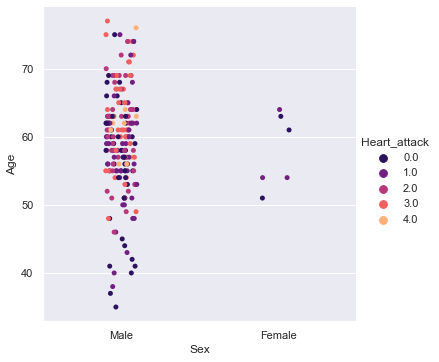

In [246]:
sns.catplot(data=df_va, x='Sex', y='Age', hue='Heart_attack', palette='magma', legend=True) # target presents having or not having heart diseases


It is very clear that the majority of heart disease is in the first gorup of males.

In [247]:
df_va['Sex'].value_counts()

Male      194
Female      6
Name: Sex, dtype: int64

In [248]:
sort_by_st_depression = df_va.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_st_depression.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
10,Male,1.320833,55
5,Male,0.000000,38
14,Male,2.000000,25
11,Male,1.500000,20
8,Male,1.000000,16
16,Male,3.000000,13
15,Male,2.500000,9
6,Male,0.500000,7
18,Male,4.000000,4
0,Female,0.000000,2


It shows really intresting asymetric rates where ST depression can cause heart attack.

### 3.4.2 Machine Learing VA dataset <a class="anchor" id="section3.4.2"></a>

In [249]:
# Selected feature

X_data = data_va.drop(['Heart_attack'],axis=1)
y_data = data_va['Heart_attack']

In [250]:
scores = pd.DataFrame(columns = ['Test Type','Accuracy','F1'])

In [251]:
for rand in range(10):
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=rand)
    
    #Perform normalization
    scaler = StandardScaler()
    
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    #Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Logistic Regression',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #Decision Tree
    model = DecisionTreeClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Decision Tree',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #Random Forest
    model = RandomForestClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['Random Forest',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]
    
    #KNN
    model = KNeighborsClassifier()
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    
    scores.loc[len(scores)] = ['KNN',accuracy_score(y_test,y_predict),f1_score(y_test,y_predict, average='micro')]

In [252]:
scores.groupby('Test Type').mean()

,Accuracy,F1
Test Type,,
Decision Tree,0.3250,0.3250
KNN,0.3625,0.3625
Logistic Regression,0.2875,0.2875
Random Forest,0.3550,0.3550


It seems here Random Forest has also the better accuracy.

In [253]:
# Model
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

Let's evaluate the model once again.

In [254]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [255]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

Assess the fit with a confusion matrix

In [256]:
# Issue confusion_matrix method has been shadowed by the DataFrame
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[5, 4, 3, 2, 0],
       [4, 5, 0, 1, 0],
       [0, 4, 1, 0, 0],
       [1, 2, 1, 5, 0],
       [0, 1, 1, 0, 0]], dtype=int64)

### 3.4.3. Model Validation VA dataset <a class="anchor" id="section3.4.3"></a>

ML explainability tools

**Permutation importance** is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more [here](https://www.kaggle.com/dansbecker/permutation-importance).

In [257]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0700 ± 0.0860,Cholesterol
0.0550 ± 0.0374,Maximum_heart_rate
0.0450 ± 0.0374,Fasting_blood_sugar
0.0450 ± 0.0490,Resting_blood_pressure
0.0450 ± 0.0735,Age
0.0200 ± 0.0374,Exercise_induced_angina
0.0000 ± 0.0707,Chest_pain
0 ± 0.0000,Sex
-0.0050 ± 0.0200,ST_slope
-0.0200 ± 0.0663,ST_depression


So, it seems that the most important factor in terms of permutation are the Fasting blood sugar, ST depression, Exercise induced anginam, Cholesterol, Resting blood pressure and the Age.

Let's take a closer look at the nimber of major vessels using a **Partial Dependence Plot** (more [here](https://www.kaggle.com/dansbecker/partial-plots)). These plots vary a single variable in a single row across a range of values and see what effect it has on the outcome. It does this for several rows and plots the average effect. Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation importance list

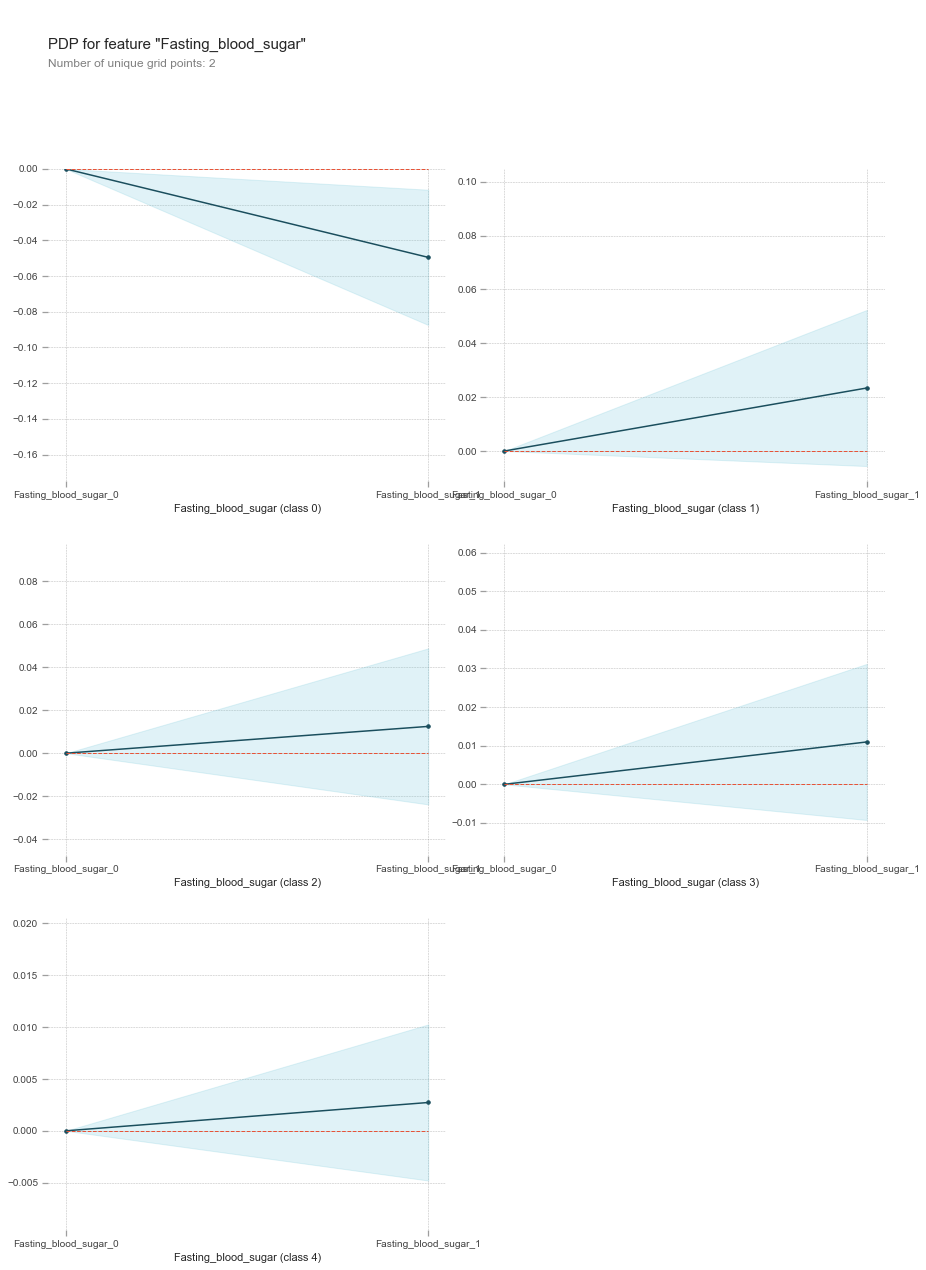

In [258]:
base_features = data_va.columns.values.tolist()
base_features.remove('Heart_attack')

feat_name = 'Fasting_blood_sugar'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Fasting glucose should be considered as predictors of risk for stroke and coronary heart disease.

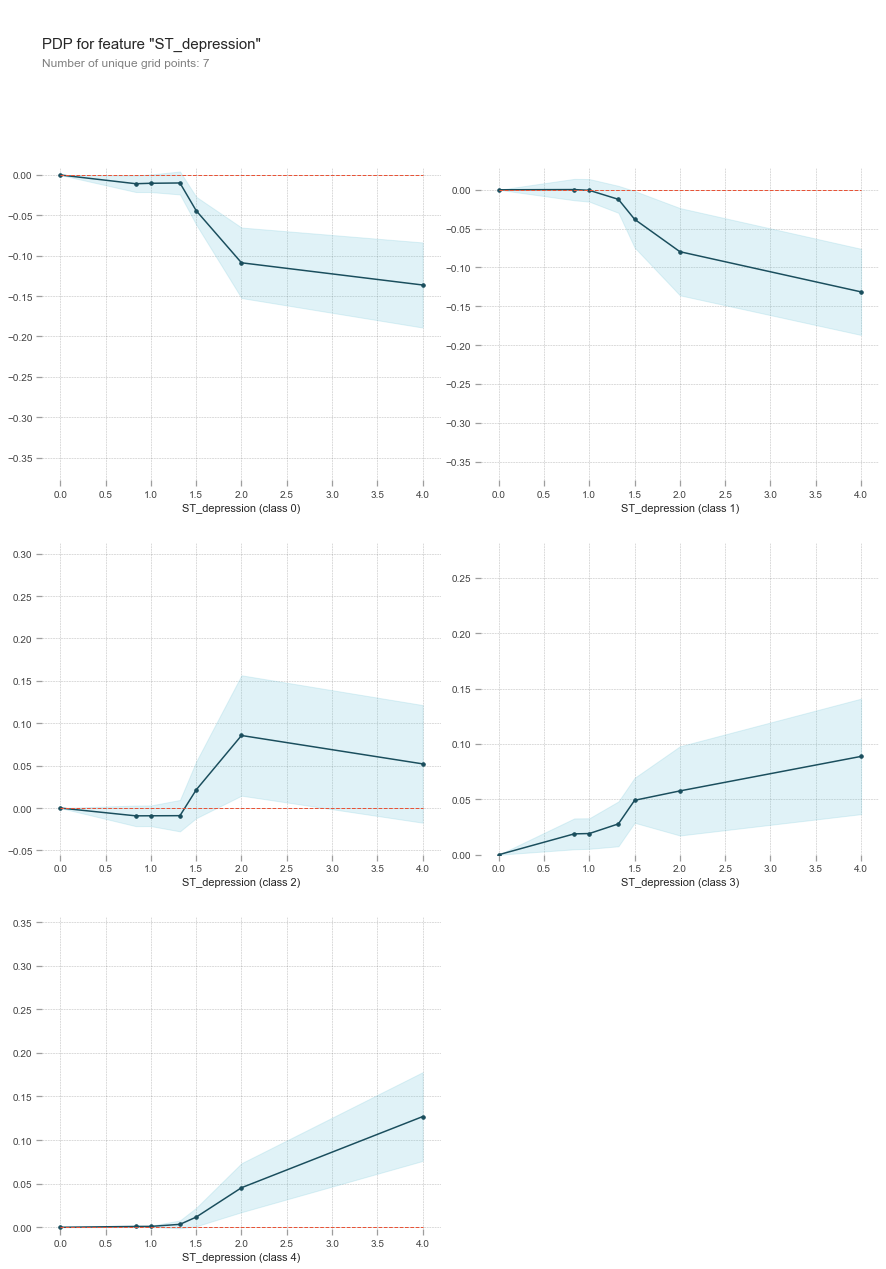

In [259]:
base_features = data_va.columns.values.tolist()
base_features.remove('Heart_attack')

feat_name = 'ST_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Depression itself is an independent risk factor for adverse cardiac events in patients without known heart disease. On the other hand, patients with known heart disease, particularly those who develop a heart attack, are at increased risk of developing new diagnosis of depression.

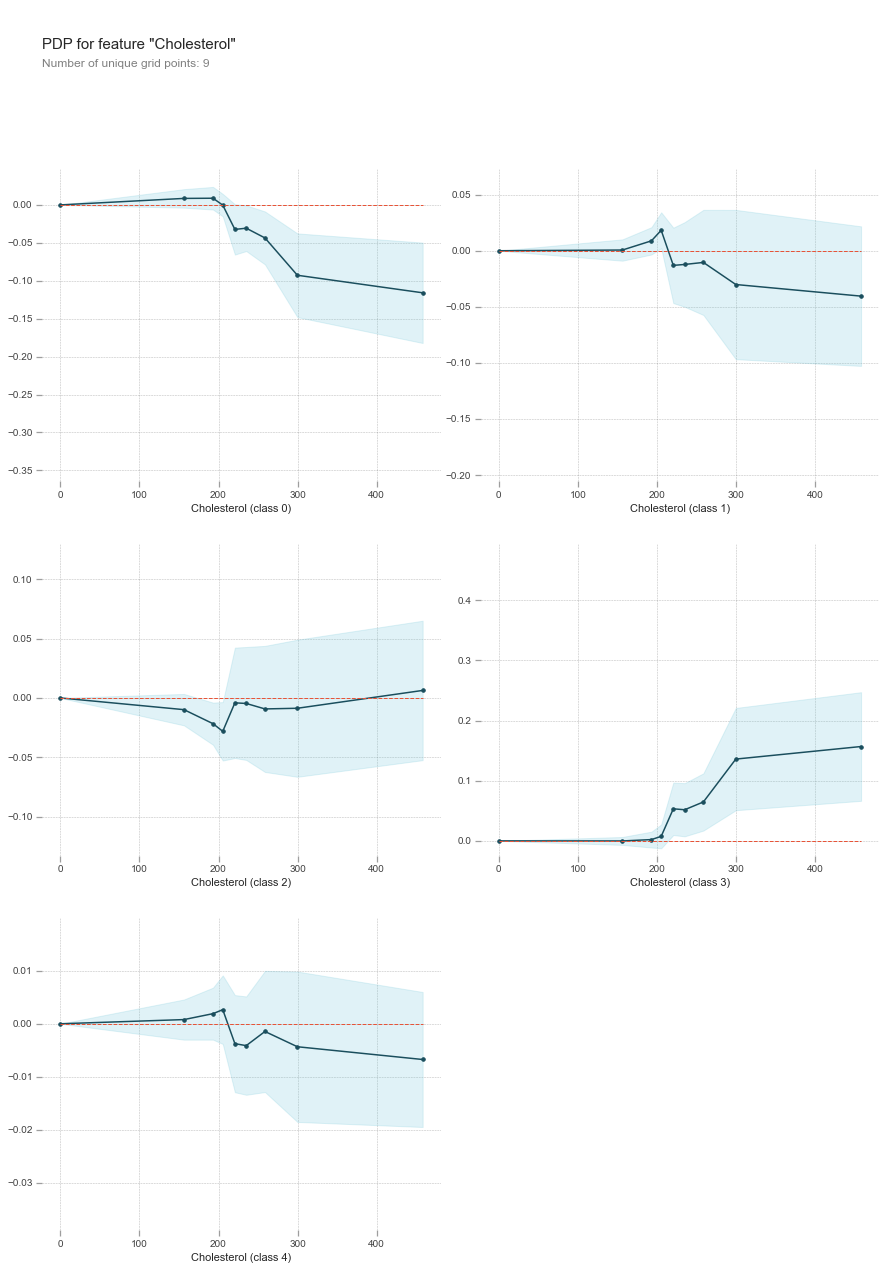

In [260]:
base_features = data_va.columns.values.tolist()
base_features.remove('Heart_attack')

feat_name = 'Cholesterol'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

High levels of cholesterol can increase the risk of heart disease. With high cholesterol, you can develop fatty deposits in your blood vessels. Eventually, these deposits grow, making it difficult for enough blood to flow through arteries.

## 4. Compound of datasets <a class="anchor" id="section4"></a>

When combining data from multiple sources there is often a lot of issues to correct for. Different sources will often have different naming conventions than your main source, different ways of grouping data, etc.

Based on the analyses of all four datasets. We can deduct what we can possibly merge into one dataset. The research shows that the highies accuracy of a model we can expect from **the Cleveland dataset** with 91% accuracy while on the contrary we have **Hungarian dataset** with 71% accuracy, **Switzerland dataset** with 40% and **VA dataset** with 34% acurracy.

However, the Switzerland and VA datasets have a lot of risk features with missing values such as Cholesteral and ST depression which are crucial for a proper cardiovascular prediction. In particular, the Cleveland data is the only one that has been used with a variety of data. 

## 5.Conclusion <a class="anchor" id="section5"></a>

The overall graphical analysis shows that females tend to suffer less from heart disease and that men have a higher chances of getting struck by a heart disease. All men indepenitelly the age group are suffering from heart disease which isn't the case with women. However, women are having higher levels of fasting blood sugar and ST depression which is a huge risk factor for adverse cardiac issues. 

The research shows various results where the patterns indicate that the cardiovascular disease, including heart disease and stroke, are preventable.

## 6. References <a class="anchor" id="section6"></a>

[1] Heart Disease Data Set, https://archive.ics.uci.edu/ml/datasets/Heart+Disease

[2] Understand Your Risks to Prevent a Heart Attack, https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack

[3] Receiver operating characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic

[4] Permutation Importance, https://www.kaggle.com/dansbecker/permutation-importance

[5] Partial Dependence Plots, https://www.kaggle.com/dansbecker/partial-plots

[6] Advanced Uses of SHAP Values, https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

[7] World Health Organization Cardiovascular Diseases, https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1